In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import re
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('../data/d01_raw/train.csv')

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\2275389496.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/d01_raw/train.csv')


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.loc[df.Age.isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [6]:
# df.Age.astype(int)

In [7]:
non_numeric_mask = ~df.Age.str.isdigit()

In [8]:
non_numeric_values = df.loc[non_numeric_mask]
non_numeric_values

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34_,#F%$D@*&8,Lawyer,10909427.0,NaN,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
58,0x1658,CUS_0x5407,March,Annk,30_,500-92-6408,Media_Manager,34081.38,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",31,14,17.13,5.0,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
71,0x1669,CUS_0x4157,August,Charlie Zhur,24_,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,8.24,8.0,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.57176724837916,High_spent_Large_value_payments,742.9221908300779,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,38_,546-94-4789,Manager,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.61171819143637,High_spent_Small_value_payments,332.269998,Standard
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48_,#F%$D@*&8,Developer,22620.79,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,-500,340-85-7301,Lawyer,42903.79,NaN,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [9]:
df['Age'] = df['Age'].str.replace(r'[^0-9]', '', regex=True) #tirar valores da idade com __

In [10]:
non_numeric_values = df.loc[non_numeric_mask]
non_numeric_values

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34,#F%$D@*&8,Lawyer,10909427.0,NaN,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
58,0x1658,CUS_0x5407,March,Annk,30,500-92-6408,Media_Manager,34081.38,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",31,14,17.13,5.0,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
71,0x1669,CUS_0x4157,August,Charlie Zhur,24,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,8.24,8.0,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.57176724837916,High_spent_Large_value_payments,742.9221908300779,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,38,546-94-4789,Manager,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.61171819143637,High_spent_Small_value_payments,332.269998,Standard
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,#F%$D@*&8,Developer,22620.79,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500,340-85-7301,Lawyer,42903.79,NaN,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [11]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [12]:
df.Age = df.Age.astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [14]:
df["Age"].loc[df["Age"] > 100].value_counts()

Age
500     886
6799      4
4307      3
1692      3
2980      3
       ... 
7178      1
5621      1
1908      1
4583      1
1342      1
Name: count, Length: 1682, dtype: int64

In [15]:
Q1 = df['Age'].quantile(0.25) # primeiro quartil (pega os valores de 25% para baixo)
Q3 = df['Age'].quantile(0.95) # terceiro quartil (pega os valores de 95% para baixo)
IQR = Q3 - Q1 # calcula a diferença entre o primeiro e o terceiro quartil

In [16]:
Q1

25.0

In [17]:
Q3

54.0

In [18]:
IQR

29.0

In [19]:
upper_bound = Q3 + 1.5 * IQR


In [20]:
upper_bound

97.5

In [21]:
df.loc[df['Age'] > upper_bound]["Age"].value_counts()

Age
500     886
6799      4
4307      3
1692      3
2980      3
       ... 
5621      1
1908      1
4583      1
7549      1
1342      1
Name: count, Length: 1684, dtype: int64

In [22]:
df['Age'] = df['Age'].apply(lambda x:  ceil(upper_bound) if x > upper_bound else x) # Alteração de outliers

In [23]:
df.loc[df["Age"] == ceil(upper_bound)]['Age'].value_counts()

Age
98    2778
Name: count, dtype: int64

In [24]:
df.loc[df["Age"] == ceil(upper_bound)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
56,0x1656,CUS_0x5407,January,Annk,98,500-92-6408,Media_Manager,34081.38_,NaN,8,7,15,3,"Not Specified, Auto Loan, and Student Loan",30,11,17.13,5.0,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
113,0x16ab,CUS_0xff4,February,NaN,98,655-05-7666,Entrepreneur,25546.26,NaN,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",16,13,7.83,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
122,0x16b8,CUS_0x33d2,March,Chalmersa,98,965-46-2491,Scientist,31993.78,2942.148333,6,6,7,2,"Payday Loan, and Home Equity Loan",8,14,10.28,1.0,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
219,0x1749,CUS_0x3edc,April,Williamso,98,663-16-3845,Accountant,43070.24,3622.186667,3,3,18,1,Debt Consolidation Loan,11,8,8.97,4.0,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,98,683-59-7399,Media_Manager,20059.98,1523.665000,8,5,12,4,"Home Equity Loan, Payday Loan, Not Specified, ...",25,11,2.97,3.0,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.71358019803843,High_spent_Small_value_payments,292.576093,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,98,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99950,0x25fa4,CUS_0x51b3,July,Ryana,98,837-85-9800,Media_Manager,59146.36,4908.863333,3,6,6,1,Personal Loan,8,6,6.68,5.0,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.3763201756033,Low_spent_Small_value_payments,251.731594,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,98,340-85-7301,Lawyer,42903.79,NaN,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


In [25]:
month_dic = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6,
    'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12
}

In [26]:
df["Number_Month"] = df["Month"].str.lower().map(month_dic) # Criação da coluna para indentificar os meses em números

In [27]:
df["Number_Month"].value_counts()

Number_Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: count, dtype: int64

In [28]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [30]:
df.loc[df["Name"].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,8
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.1,3.0,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good,2
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard,7
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,5,7,-100,"Personal Loan, Debt Consolidation Loan, and Au...",13,11,8.24,3.0,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good,1
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,5,20,3_,"Credit-Builder Loan, Personal Loan, and Auto Loan",16,20,11.0,4.0,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.30669710658556,High_spent_Medium_value_payments,362.54571194023237,Standard,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good,5
99965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,14,-1,5.1,1.0,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good,6
99969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,5,-100,"Payday Loan, Student Loan, Mortgage Loan, and ...",3,0,5.69,4.0,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good,2
99973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,NaN,0.6900000000000004,8.0,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good,6


In [31]:
name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])
#Agrupar o dado pelo customer_id para verificar caso exista algum dado com nome nulo e outro dado com um nome cadastrado
name_null


C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\3819400334.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])


ID Customer_ID     Month            Name  Age  \
Customer_ID                                                             
CUS_0x1000  56752  0x1628a  CUS_0x1000   January  Alistair Barrf   17   
            56753  0x1628b  CUS_0x1000  February             NaN   17   
            56754  0x1628c  CUS_0x1000     March  Alistair Barrf   17   
            56755  0x1628d  CUS_0x1000     April  Alistair Barrf   17   
            56756  0x1628e  CUS_0x1000       May  Alistair Barrf   17   
...                    ...         ...       ...             ...  ...   
CUS_0xffd   99155  0x25afd   CUS_0xffd     April        Damouniq   29   
            99156  0x25afe   CUS_0xffd       May        Damouniq   29   
            99157  0x25aff   CUS_0xffd      June             NaN   29   
            99158  0x25b00   CUS_0xffd      July        Damouniq   30   
            99159  0x25b01   CUS_0xffd    August        Damouniq   30   

                           SSN Occupation Annual_Income  \
Customer_ID                                               
CUS_0x1000  56752  913-74-1218     Lawyer      30625.94   
            56753  913-74-1218     Lawyer      30625.94   
            56754  913-74-1218     Lawyer     30625.94_   
            56755  913-74-1218     Lawyer      30625.94   
            56756  913-74-1218     Lawyer      30625.94   
...                        ...        ...           ...   
CUS_0xffd   99155  832-88-8320  Scientist      41398.44   
            99156  832-88-8320    _______      41398.44   
            99157  832-88-8320  Scientist      41398.44   
            99158  832-88-8320  Scientist     41398.44_   
            99159  832-88-8320  Scientist      41398.44   

                   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Customer_ID                                                                    
CUS_0x1000  56752            2706.161667                  6                5   
            56753                    NaN                  6                5   
            56754            2706.161667                  6                5   
            56755            2706.161667                  6                5   
            56756            2706.161667                  6                5   
...                                  ...                ...              ...   
CUS_0xffd   99155            3749.870000                  8                7   
            99156            3749.870000                  8                7   
            99157                    NaN                  8                7   
            99158            3749.870000                  8                7   
            99159            3749.870000                  8                7   

                   Interest_Rate Num_of_Loan  \
Customer_ID                                    
CUS_0x1000  56752             27           2   
            56753             27           2   
            56754             27           2   
            56755             27           2   
            56756             27           2   
...                          ...         ...   
CUS_0xffd   99155             13        -100   
            99156             13          6_   
            99157             13           6   
            99158             13           6   
            99159             13           6   

                                                        Type_of_Loan  \
Customer_ID                                                            
CUS_0x1000  56752          Credit-Builder Loan, and Home Equity Loan   
            56753          Credit-Builder Loan, and Home Equity Loan   
            56754          Credit-Builder Loan, and Home Equity Loan   
            56755          Credit-Builder Loan, and Home Equity Loan   
            56756          Credit-Builder Loan, and Home Equity Loan   
...                                                              ...   
CUS_0xffd   99155  Auto Loan, Payday Loan, Payday Loan, Mortgage

In [32]:
df['Name'] = df.groupby('Customer_ID')['Name'].transform(lambda x: x.bfill().ffill()) # Preencher os nomes nuloes com os valores corretos

In [33]:
name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])
name_null

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\744891109.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  name_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Name'].isna()) | ~(x['Name'].isna())])


ID Customer_ID     Month            Name  Age  \
Customer_ID                                                             
CUS_0x1000  56752  0x1628a  CUS_0x1000   January  Alistair Barrf   17   
            56753  0x1628b  CUS_0x1000  February  Alistair Barrf   17   
            56754  0x1628c  CUS_0x1000     March  Alistair Barrf   17   
            56755  0x1628d  CUS_0x1000     April  Alistair Barrf   17   
            56756  0x1628e  CUS_0x1000       May  Alistair Barrf   17   
...                    ...         ...       ...             ...  ...   
CUS_0xffd   99155  0x25afd   CUS_0xffd     April        Damouniq   29   
            99156  0x25afe   CUS_0xffd       May        Damouniq   29   
            99157  0x25aff   CUS_0xffd      June        Damouniq   29   
            99158  0x25b00   CUS_0xffd      July        Damouniq   30   
            99159  0x25b01   CUS_0xffd    August        Damouniq   30   

                           SSN Occupation Annual_Income  \
Customer_ID                                               
CUS_0x1000  56752  913-74-1218     Lawyer      30625.94   
            56753  913-74-1218     Lawyer      30625.94   
            56754  913-74-1218     Lawyer     30625.94_   
            56755  913-74-1218     Lawyer      30625.94   
            56756  913-74-1218     Lawyer      30625.94   
...                        ...        ...           ...   
CUS_0xffd   99155  832-88-8320  Scientist      41398.44   
            99156  832-88-8320    _______      41398.44   
            99157  832-88-8320  Scientist      41398.44   
            99158  832-88-8320  Scientist     41398.44_   
            99159  832-88-8320  Scientist      41398.44   

                   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Customer_ID                                                                    
CUS_0x1000  56752            2706.161667                  6                5   
            56753                    NaN                  6                5   
            56754            2706.161667                  6                5   
            56755            2706.161667                  6                5   
            56756            2706.161667                  6                5   
...                                  ...                ...              ...   
CUS_0xffd   99155            3749.870000                  8                7   
            99156            3749.870000                  8                7   
            99157                    NaN                  8                7   
            99158            3749.870000                  8                7   
            99159            3749.870000                  8                7   

                   Interest_Rate Num_of_Loan  \
Customer_ID                                    
CUS_0x1000  56752             27           2   
            56753             27           2   
            56754             27           2   
            56755             27           2   
            56756             27           2   
...                          ...         ...   
CUS_0xffd   99155             13        -100   
            99156             13          6_   
            99157             13           6   
            99158             13           6   
            99159             13           6   

                                                        Type_of_Loan  \
Customer_ID                                                            
CUS_0x1000  56752          Credit-Builder Loan, and Home Equity Loan   
            56753          Credit-Builder Loan, and Home Equity Loan   
            56754          Credit-Builder Loan, and Home Equity Loan   
            56755          Credit-Builder Loan, and Home Equity Loan   
            56756          Credit-Builder Loan, and Home Equity Loan   
...                                                              ...   
CUS_0xffd   99155  Auto Loan, Payday Loan, Payday Loan, Mortgage

In [34]:
df.iloc[56753]

ID                                                            0x1628b
Customer_ID                                                CUS_0x1000
Month                                                        February
Name                                                   Alistair Barrf
Age                                                                17
SSN                                                       913-74-1218
Occupation                                                     Lawyer
Annual_Income                                                30625.94
Monthly_Inhand_Salary                                             NaN
Num_Bank_Accounts                                                   6
Num_Credit_Card                                                     5
Interest_Rate                                                      27
Num_of_Loan                                                         2
Type_of_Loan                Credit-Builder Loan, and Home Equity Loan
Delay_from_due_date 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [36]:
len(df.loc[df["Occupation"].str.contains("_")])

13294

In [37]:
occupation_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Occupation'].str.contains("_")) | ~(x['Occupation'].str.contains("_"))])
occupation_null

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\2889301033.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  occupation_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Occupation'].str.contains("_")) | ~(x['Occupation'].str.contains("_"))])


ID Customer_ID     Month            Name  Age  \
Customer_ID                                                             
CUS_0x1000  56752  0x1628a  CUS_0x1000   January  Alistair Barrf   17   
            56753  0x1628b  CUS_0x1000  February  Alistair Barrf   17   
            56754  0x1628c  CUS_0x1000     March  Alistair Barrf   17   
            56755  0x1628d  CUS_0x1000     April  Alistair Barrf   17   
            56756  0x1628e  CUS_0x1000       May  Alistair Barrf   17   
...                    ...         ...       ...             ...  ...   
CUS_0xffd   99155  0x25afd   CUS_0xffd     April        Damouniq   29   
            99156  0x25afe   CUS_0xffd       May        Damouniq   29   
            99157  0x25aff   CUS_0xffd      June        Damouniq   29   
            99158  0x25b00   CUS_0xffd      July        Damouniq   30   
            99159  0x25b01   CUS_0xffd    August        Damouniq   30   

                           SSN Occupation Annual_Income  \
Customer_ID                                               
CUS_0x1000  56752  913-74-1218     Lawyer      30625.94   
            56753  913-74-1218     Lawyer      30625.94   
            56754  913-74-1218     Lawyer     30625.94_   
            56755  913-74-1218     Lawyer      30625.94   
            56756  913-74-1218     Lawyer      30625.94   
...                        ...        ...           ...   
CUS_0xffd   99155  832-88-8320  Scientist      41398.44   
            99156  832-88-8320    _______      41398.44   
            99157  832-88-8320  Scientist      41398.44   
            99158  832-88-8320  Scientist     41398.44_   
            99159  832-88-8320  Scientist      41398.44   

                   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Customer_ID                                                                    
CUS_0x1000  56752            2706.161667                  6                5   
            56753                    NaN                  6                5   
            56754            2706.161667                  6                5   
            56755            2706.161667                  6                5   
            56756            2706.161667                  6                5   
...                                  ...                ...              ...   
CUS_0xffd   99155            3749.870000                  8                7   
            99156            3749.870000                  8                7   
            99157                    NaN                  8                7   
            99158            3749.870000                  8                7   
            99159            3749.870000                  8                7   

                   Interest_Rate Num_of_Loan  \
Customer_ID                                    
CUS_0x1000  56752             27           2   
            56753             27           2   
            56754             27           2   
            56755             27           2   
            56756             27           2   
...                          ...         ...   
CUS_0xffd   99155             13        -100   
            99156             13          6_   
            99157             13           6   
            99158             13           6   
            99159             13           6   

                                                        Type_of_Loan  \
Customer_ID                                                            
CUS_0x1000  56752          Credit-Builder Loan, and Home Equity Loan   
            56753          Credit-Builder Loan, and Home Equity Loan   
            56754          Credit-Builder Loan, and Home Equity Loan   
            56755          Credit-Builder Loan, and Home Equity Loan   
            56756          Credit-Builder Loan, and Home Equity Loan   
...                                                              ...   
CUS_0xffd   99155  Auto Loan, Payday Loan, Payday Loan, Mortgage

In [38]:
df["Occupation"].str.contains(r'[()\-_$#@!%&*]', regex=True).value_counts() 

Occupation
False    86706
True     13294
Name: count, dtype: int64

In [39]:
df.loc[df["Occupation"].str.contains(r'[()\-_$#@!%&*]', regex=True) & ~df["Occupation"].str.contains(r'[a-zA-Z]', regex=True)] # Identificar valores nulos

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,1
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good,1
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good,3
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.1,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good,5
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,5,4,1,Not Specified,5,6,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37,647-67-8889,_______,139664.96,11777.746667,3,6,12,4,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,12,18.39,8.0,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard,1
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38,546-94-4789,_______,15319.65,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor,8
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,98,226-45-0652,_______,22620.79,1722.065833,7,3,9,0_,NaN,25,NaN,5.31,2.0,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard,2
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,_______,22620.79,NaN,6,2,9,0,NaN,27,15,5.31,2.0,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor,8


In [40]:
def replace_with_nan(x):
    x.loc[x.str.contains(r'[()\-_$#@!%&*]', regex=True) & ~x.str.contains(r'[a-zA-Z]', regex=True)] = np.nan
    return x

# Alterar valores com _ para NaN

In [41]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(replace_with_nan) # agrupando pelo Customer_ID e chamando a função

In [42]:
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.bfill().ffill()) # Preenchendo os valores nulos

In [43]:
df.loc[df["Customer_ID"] == "CUS_0xffd"] # Testando para ver se funfou

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
99152,0x25afa,CUS_0xffd,January,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",25,9,10.07,1801.0,Standard,1701.88,29.506673,18 Years and 2 Months,Yes,182.976649,195.52927326749446,Low_spent_Large_value_payments,266.481077,Standard,1
99153,0x25afb,CUS_0xffd,February,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,12,10.07,NaN,_,1701.88,27.117338,18 Years and 3 Months,Yes,182.976649,132.3633479629823,Low_spent_Small_value_payments,349.647003,Standard,2
99154,0x25afc,CUS_0xffd,March,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",25,12,10.07,7.0,Standard,1701.88,25.175964,18 Years and 4 Months,Yes,182.976649,336.13023109571515,Low_spent_Small_value_payments,145.880119,Standard,3
99155,0x25afd,CUS_0xffd,April,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,-100,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",19,12,10.07,7.0,_,1701.88,36.384516,18 Years and 5 Months,Yes,182.976649,234.3549398533252,!@9#%8,247.655411,Standard,4
99156,0x25afe,CUS_0xffd,May,Damouniq,29,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6_,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,NaN,10.07,7.0,Standard,1701.88,26.166508,18 Years and 6 Months,Yes,182.976649,104.6294735081563,High_spent_Medium_value_payments,337.380877,Standard,5
99157,0x25aff,CUS_0xffd,June,Damouniq,29,832-88-8320,Scientist,41398.44,NaN,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,12,10.07,7.0,Standard,1701.88,36.970072,18 Years and 7 Months,Yes,182.976649,47.007378731604064,High_spent_Medium_value_payments,395.002972,Standard,6
99158,0x25b00,CUS_0xffd,July,Damouniq,30,832-88-8320,Scientist,41398.44_,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,12,10.07,7.0,Standard,1701.88,33.916363,18 Years and 8 Months,Yes,182.976649,257.98969352901736,High_spent_Small_value_payments,194.020657,Good,7
99159,0x25b01,CUS_0xffd,August,Damouniq,30,832-88-8320,Scientist,41398.44,3749.87,8,7,13,6,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",23,11,12.07,7.0,Standard,1701.88,39.916655,18 Years and 9 Months,Yes,182.976649,42.57571978536272,High_spent_Large_value_payments,389.434631,Good,8


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [45]:
df["Annual_Income"].nunique()

18940

In [46]:
df.loc[df["Annual_Income"].isna()].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [47]:
df.loc[df["Annual_Income"].str.contains(r'[()\-_$#@!%&*]', regex=True)].tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
99959,0x25fb1,CUS_0x2084,August,Ryanl,21,253-72-7758,Architect,38321.39_,3106.647859,4,4,3,4,"Student Loan, Debt Consolidation Loan, Student...",6,7,1.59,6.0,_,678.57,28.951691,17 Years and 6 Months,No,362.072453,259.1356349754664,Low_spent_Medium_value_payments,242.038135,Standard,8
99974,0x25fc8,CUS_0xf16,July,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35_,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",1,NaN,11.69,8.0,_,897.16,36.166925,21 Years and 7 Months,No,41.113561,NaN,Low_spent_Small_value_payments,340.684834,Good,7
99981,0x25fd3,CUS_0xaf61,June,Chris Wickhamm,50,133-16-7738,Writer,37188.1_,3097.008333,1,4,5,3,"Home Equity Loan, Mortgage Loan, and Student Loan",5,12,5.38,3.0,Good,620.64,37.753013,30 Years and 2 Months,NM,84.205949,147.33990786653956,Low_spent_Small_value_payments,368.154976,Good,6
99993,0x25fe7,CUS_0x942c,February,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,NaN,11.5,3.0,Good,502.38,29.135447,31 Years and 4 Months,No,58638.000000,180.7330951944497,Low_spent_Medium_value_payments,400.104466,Standard,2
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.0,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor,8


In [48]:
df.loc[~df["Annual_Income"].str.isdigit()].head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [49]:
df["Annual_Income"] = df['Annual_Income'].str.replace(r'[^0-9]', '', regex=True) #tirando qualquer tipo de caracter não numérico do valor

In [50]:
df["Annual_Income"] = df["Annual_Income"].astype(float) # transformando de tipo object para float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [52]:
len(df.loc[df["Monthly_Inhand_Salary"].isna()]) # identificando quantidade de valores nulos

15002

In [53]:
monthly_salaray_nan = df[df['Monthly_Inhand_Salary'].isna()]['Customer_ID'].unique() # pegando os customer_id que possuem NaN na coluna
customers_id = df[df['Customer_ID'].isin(monthly_salaray_nan)]  # buscando apenas os customer_id que estejam na variavel para verificar se ele possui algum valor em outro mês
customers_id.head(5)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [54]:
mean_salary  = customers_id.groupby("Customer_ID")["Monthly_Inhand_Salary"].apply(lambda x:  x.median()) #colocando a media para cada Customer_id na coluna de salario
mean_salary = pd.DataFrame(mean_salary) # transformando em um df
mean_salary

,Monthly_Inhand_Salary
Customer_ID,
CUS_0x1000,2706.161667
CUS_0x100b,9549.782500
CUS_0x1011,5208.872500
CUS_0x1013,7962.415000
CUS_0x1015,3725.585000
...,...
CUS_0xfe3,3607.015000
CUS_0xfe5,7934.017500
CUS_0xff3,1176.398750


In [55]:
df.loc[df["Monthly_Inhand_Salary"].isna(), "Monthly_Inhand_Salary"] = customers_id["Customer_ID"].map(mean_salary["Monthly_Inhand_Salary"])
# buscando no df original todos os dados que são nulos na coluna "salary", e apenas exibindo ela e atribuindo ela o valor da media utilizando o método map já que no df mean_salary o index é o Customer_id
                                                                                                                    

In [56]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [57]:

df.loc[(df["Monthly_Inhand_Salary"] == 0) | (df["Monthly_Inhand_Salary"] < 0)] # verificando caso exista algum valor também "nulo"

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


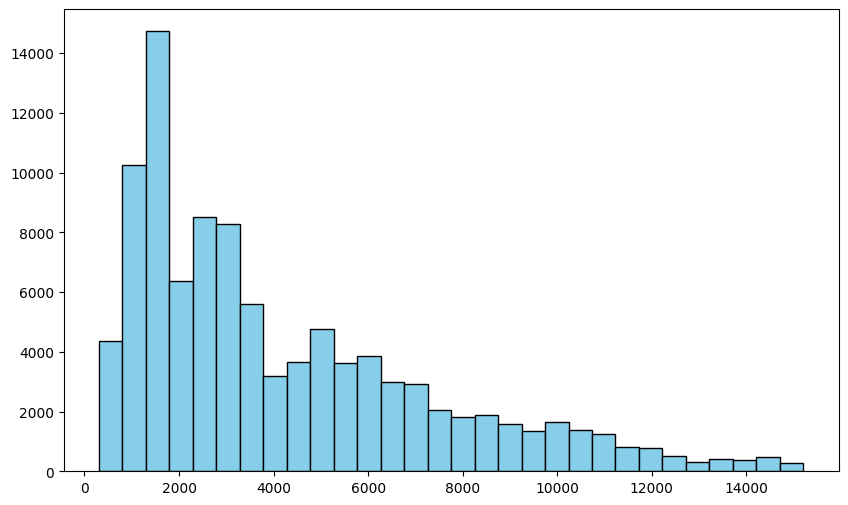

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(df["Monthly_Inhand_Salary"], bins=30, color='skyblue', edgecolor='black')
plt.show()


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [60]:
df["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64

In [61]:
df.loc[df["Num_Bank_Accounts" ] < 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
30330,0xc7b8,CUS_0x4f2a,March,Margaretf,39,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2_,"Auto Loan, and Not Specified",5,3,9.49,6.0,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.9223857499363,High_spent_Large_value_payments,855.9049597507532,Standard,3
30331,0xc7b9,CUS_0x4f2a,April,Margaretf,40,#F%$D@*&8,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",5,6,14.49,6.0,Good,1151.7_,39.369401,22 Years and 6 Months,No,196.587321,524.3044177743545,Low_spent_Large_value_payments,592.522927726335,Good,4
30332,0xc7ba,CUS_0x4f2a,May,Margaretf,40,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",1,8,9.49,6.0,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.0966753535676,High_spent_Large_value_payments,936.7306701471217,Good,5
30333,0xc7bb,CUS_0x4f2a,June,Margaretf,40,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",5,6,9.49,6.0,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.6980690205388,Low_spent_Medium_value_payments,120.12927648015079,Good,6
30334,0xc7bc,CUS_0x4f2a,July,Margaretf,40,807-03-5415,Engineer,12830576.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",9,3,9.49,6.0,Good,1151.7,35.206427,NaN,No,42850.000000,172.99202124673786,High_spent_Large_value_payments,913.8353242539515,Good,7
30335,0xc7bd,CUS_0x4f2a,August,Margaretf,40,807-03-5415,Engineer,221369200.0,10434.146667,-1,6,1,2,"Auto Loan, and Not Specified",10,6,9.49,6.0,_,1151.7,38.278518,22 Years and 10 Months,No,196.587321,338.67230317776176,High_spent_Medium_value_payments,758.1550423229277,Good,8
43689,0x115ff,CUS_0xa878,February,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,27,1,4.97,1.0,Good,607.78,37.286105,20 Years and 6 Months,No,0.000000,668.1444536762707,!@9#%8,588.9477963237292,Poor,2
43690,0x11600,CUS_0xa878,March,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,27,1,0.9699999999999998,1.0,Good,607.78,41.915627,20 Years and 7 Months,No,0.000000,142.31978881674561,High_spent_Large_value_payments,1084.7724611832548,Poor,3
43691,0x11601,CUS_0xa878,April,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,27,1,4.97,1.0,Good,607.78,41.799942,20 Years and 8 Months,No,0.000000,467.563922615828,High_spent_Small_value_payments,779.528327384172,Poor,4
43692,0x11602,CUS_0xa878,May,Douwe Miedemaz,54,300-54-4627,Engineer,11785107.0,9870.922500,-1,6,7,0,NaN,25,2,2.97,1.0,Good,607.78,46.244581,20 Years and 9 Months,No,0.000000,NaN,High_spent_Large_value_payments,1037.5063384360787,Poor,5


In [62]:
num_bank_account_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # agrupando pelo costumerID e verificando quais possuem valores nulos
index_bank_account_null = num_bank_account_null.droplevel(-1).index #pegando os customer_id

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\219030965.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  num_bank_account_null=  df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # agrupando pelo costumerID e verificando quais possuem valores nulos


In [63]:
filtered_df = df[df['Customer_ID'].isin(index_bank_account_null)] # pegando apenas os dados que possuem o customer_id contido na variavel num_bank_account_null
filtered_df


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
48,0x164a,CUS_0x284a,January,Nadiaq,33,411-51-0676,Lawyer,1313134.0,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,2.0,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.1712535207537,High_spent_Medium_value_payments,858.462474411158,Good,1
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,1313134.0,11242.783333,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",-1,2,15.34,4.0,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good,2
50,0x164c,CUS_0x284a,March,Nadiaq,34,411-51-0676,Lawyer,1313134.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,3,9.34,4.0,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.06432109973838,High_spent_Large_value_payments,1038.5694068321734,Good,3
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,1313134.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,4
52,0x164e,CUS_0x284a,May,Nadiaq,34,411-51-0676,Lawyer,1313134.0,10469.207759,0,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,4,9.34,4.0,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.3789089320552,High_spent_Large_value_payments,963.2548189998564,Good,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,98,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard,4
99964,0x25fba,CUS_0x372c,May,Lucia Mutikanik,18,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,0,5.1,1.0,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good,5
99965,0x25fbb,CUS_0x372c,June,Lucia Mutikanik,19,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,-1,5.1,1.0,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good,6
99966,0x25fbc,CUS_0x372c,July,Lucia Mutikanik,19,340-85-7301,Lawyer,4290379.0,3468.315833,0,4,6,1,Not Specified,14,NaN,5.1,1.0,Good,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.87379807398983,Low_spent_Medium_value_payments,350.982329,Good,7


In [64]:
count_per_customer_id = filtered_df['Customer_ID'].value_counts() #pegar a quantidade de customer_id para realizar o replace
count_per_customer_id

Customer_ID
CUS_0x284a    8
CUS_0x3cc2    8
CUS_0x7d80    8
CUS_0x78cd    8
CUS_0x89e3    8
             ..
CUS_0x76ed    8
CUS_0x59b6    8
CUS_0xa96d    8
CUS_0x40a3    8
CUS_0x372c    8
Name: count, Length: 563, dtype: int64

In [65]:
df.loc[df['Customer_ID'].isin(index_bank_account_null) & (df['Num_Bank_Accounts'] <= 0), 'Num_Bank_Accounts'] = df['Customer_ID'].map(count_per_customer_id) 
# verificando se o customer_id está contido na lista dos index que possuem valores nulos de conta.
# pegando os dados que estão nulos da coluna num_bank_accounts
# realizando a substituição batendo o index com a coluna Customer_id utilizando a função map, passando os valores com a quantidade total de registros para o id.

In [66]:
df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # verificando se os dados foram substituidos.

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\1185440196.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Customer_ID').apply(lambda x: x[(x['Num_Bank_Accounts'] <= 0)]) # verificando se os dados foram substituidos.


,,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [67]:
df.loc[df['Num_Bank_Accounts'] >= 100, 'Num_Bank_Accounts'] =  df['Num_Bank_Accounts'].mode().iloc[0] # como são poucos os dados discrepantes, vou trazer para a média

In [68]:
df.loc[df["Num_Bank_Accounts"]]["Num_Bank_Accounts"].value_counts()
# df.loc[df["Num_Bank_Accounts"]]["Num_Bank_Accounts"].value_counts().sum()

Num_Bank_Accounts
3    70876
2    29076
7       15
8       10
4        9
1        7
5        5
6        2
Name: count, dtype: int64

In [69]:
df.loc[df["SSN"].str.contains(r'[a-zA-Z]', regex=True)] # verificando dados inconsistentes 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,8
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,5,6,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard,6
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,1313134.0,10469.207759,8,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2,8.34,4.0,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good,4
54,0x1650,CUS_0x284a,July,Nadiaq,34,#F%$D@*&8,Lawyer,109094270.0,10469.207759,8,1,8,2,"Credit-Builder Loan, and Mortgage Loan",0,2_,9.34,4.0,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good,7
98,0x1694,CUS_0x3e45,March,Harriet McLeodd,35,#F%$D@*&8,Entrepreneur,5439216.0,4766.680000,6,4,14,3,"Not Specified, Student Loan, and Personal Loan",15,11,5.54,3.0,_,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349568589344514,High_spent_Large_value_payments,558.9263489897351,Standard,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99914,0x25f70,CUS_0x1619,March,Phil Wahbao,54,#F%$D@*&8,Media_Manager,2005998.0,1523.665000,8,5,360,4,"Home Equity Loan, Payday Loan, Not Specified, ...",25,9,2.97,3.0,Good,909.01,29.204711,16 Years and 5 Months,No,45.076827,111.56713873012444,Low_spent_Large_value_payments,265.722534,Poor,3
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,#F%$D@*&8,Developer,2262079.0,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor,7
99946,0x25fa0,CUS_0x51b3,March,Ryana,33,#F%$D@*&8,Media_Manager,5914636.0,4908.863333,2,5,6,1,Personal Loan,8,7,6.68,2.0,Good,418.03,35.750925,20 Years and 3 Months,No,26.778419,188.54469705568923,High_spent_Medium_value_payments,525.563217,Standard,3
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,1668035.0,1528.029167,1,1,5,4,"Payday Loan, Student Loan, Mortgage Loan, and ...",4,0,5.69,4.0,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good,1


In [70]:
df.loc[df["SSN"].str.contains(r'[a-zA-Z]', regex=True), 'SSN'] = np.nan # transformando em nulos para facilitar a manipulação

In [71]:
df['SSN'] = df.groupby('Customer_ID')['SSN'].transform(lambda x: x.bfill().ffill()) # agrupando pelo customer_id e alterando o valor nulo.

In [72]:
df.loc[df["SSN"].isna()] # verificando os dados

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [74]:
df.loc[df["Num_Credit_Card"] <= 0]["Num_Credit_Card"].value_counts() # verificando dados nulos

Num_Credit_Card
0    13
Name: count, dtype: int64

In [75]:
df.loc[df["Num_Credit_Card"] <= 0, "Num_Credit_Card"] = 1

In [76]:
df.loc[df["Num_Credit_Card"] <= 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [77]:
df.loc[df["Num_Credit_Card"], 'Num_Credit_Card'].value_counts() # outliers

Num_Credit_Card
4       93110
1385     4860
5         602
7         350
3         337
6         276
8         149
9          95
1          68
10         65
2          33
11         13
1029        5
674         4
1299        3
1005        3
898         3
688         2
1297        2
848         2
488         2
518         2
943         2
1327        2
809         1
1315        1
1381        1
1130        1
169         1
514         1
932         1
262         1
183         1
1189        1
Name: count, dtype: int64

In [78]:
df.loc[df["Num_Credit_Card"] == 1385].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,3484784.0,3037.986667,2,1385,6,1,Credit-Builder Loan,3,-1,5.42,2.0,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard,3
36457,0xeb9f,CUS_0x4b89,February,Deepa Seetharamant,21,920-87-0240,Lawyer,8996265.0,740.688750,4,1385,19,2,"Personal Loan, and Home Equity Loan",25,19,16.07,NaN,Standard,2400.0,36.679664,14 Years and 10 Months,Yes,72950.000000,12.483870045892177,High_spent_Medium_value_payments,299.21329971865083,Standard,2
37578,0xf230,CUS_0x5859,March,Slaterd,38,278-10-7087,Accountant,2994355.0,2432.295833,4,1385,6,3,"Debt Consolidation Loan, Not Specified, and Pe...",4,4,11.1,3.0,Good,348.19,24.398053,NaN,No,62.416375,168.9678233462156,High_spent_Small_value_payments,271.8453850033591,Standard,3
65034,0x19310,CUS_0x7d44,March,ewich Noelv,49,285-06-1059,Entrepreneur,3468926.0,2608.771667,7,1385,18,-100,NaN,19,12,7.55,1.0,Standard,430.6,37.949224,27 Years and 0 Months,Yes,0.000000,220.57474957567916,!@9#%8,320.30241709098755,Standard,3


In [79]:
Q1 = df['Num_Credit_Card'].quantile(0.25) # primeiro quartil (pega os valores de 25% para baixo)
Q3 = df['Num_Credit_Card'].quantile(0.95) # terceiro quartil (pega os valores de 95% para baixo)
IQR = Q3 - Q1 # calcula a diferença entre o primeiro e o terceiro quartil

In [80]:
Q1

4.0

In [81]:
Q3

10.0

In [82]:
IQR

6.0

In [83]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

19.0

In [84]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x:  ceil(upper_bound) if x > upper_bound else x)

In [85]:
df.loc[df["Interest_Rate"] <= 0] # verificando dados inconcistentes 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [86]:
df.loc[df["Interest_Rate"] > 30]['Interest_Rate'].value_counts() # verificando outliers.

Interest_Rate
32      1742
34      1502
33      1467
31      1457
3089       4
        ... 
2147       1
4995       1
1899       1
2120       1
5729       1
Name: count, Length: 1720, dtype: int64

In [87]:
df.loc[df["Interest_Rate"] > 30, 'Interest_Rate'] = df['Interest_Rate'].mode().iloc[0] # tratando com a moda.


In [88]:
df.loc[df["Interest_Rate"] > 30]['Interest_Rate'].value_counts() # verificando outliers.

Series([], Name: count, dtype: int64)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [90]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [91]:
df.loc[~(df["Num_of_Loan"].str.isdigit())] # verficiar valores com algum caracter inválido

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
31,0x162d,CUS_0xb891,August,Jasond,55,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,-100,Not Specified,4,9,1.99,4.0,Good,632.46,27.332515,17 Years and 10 Months,No,16.415452,125.61725053231268,High_spent_Small_value_payments,379.21638114119577,Standard,8
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,-100,NaN,5,12,2.58,4.0,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.000000,173.13865100158367,Low_spent_Medium_value_payments,392.1922656650829,Standard,3
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0_,NaN,5,15,2.58,4.0,Standard,943.86,29.217556,31 Years and 1 Months,Yes,0.000000,37.64363788963997,High_spent_Medium_value_payments,497.6872787770267,Standard,6
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,-100,NaN,1,15,2.58,4.0,Standard,943.86,25.862922,31 Years and 3 Months,Yes,0.000000,181.33090096186916,High_spent_Small_value_payments,364.00001570479753,Standard,8
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,1313134.0,10469.207759,8,1,8,-100,"Credit-Builder Loan, and Mortgage Loan",0,3_,11.34,4.0,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99940,0x25f96,CUS_0xad4f,May,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0_,NaN,30,18,4.31,2.0,Standard,642.46,37.450793,29 Years and 7 Months,No,0.000000,141.895743423042,Low_spent_Large_value_payments,300.31084,Standard,5
99958,0x25fb0,CUS_0x2084,July,Ryanl,21,253-72-7758,Architect,3832139.0,3106.647859,4,4,3,4_,"Student Loan, Debt Consolidation Loan, Student...",11,10,-3.41,3.0,Good,678.57,28.360351,17 Years and 5 Months,No,362.072453,182.0676508529024,Low_spent_Large_value_payments,309.10612,Standard,7
99969,0x25fc3,CUS_0xf16,February,Maria Sheahanb,45,868-70-2218,Media_Manager,1668035.0,1528.029167,1,1,5,-100,"Payday Loan, Student Loan, Mortgage Loan, and ...",3,0,5.69,4.0,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good,2
99984,0x25fda,CUS_0x8600,January,Sarah McBridec,28,031-35-0942,Architect,2000288.0,1929.906667,10,8,29,5_,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,26,18.31,9.0,Bad,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor,1


In [92]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'[^0-9]', '', regex=True) # retirando caracteres inválidos

In [93]:
df.loc[~(df["Num_of_Loan"].str.isdigit())] # verificando se funfou

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [94]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int) # conversão

In [95]:
df.loc[(df["Num_of_Loan"] <= 0) & (df["Type_of_Loan"].isna())] # está certo pois não houve nenhum tipo de empréstimo

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,5,NaN,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.0,276.72539431736266,!@9#%8,288.60552234930395,Standard,1
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,9,NaN,2.58,4.0,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.0,74.44364104999623,High_spent_Medium_value_payments,460.88727561667037,Standard,2
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,1,15,2.58,4.0,_,943.86,28.924954,30 Years and 11 Months,Yes,0.0,96.78548508587444,High_spent_Medium_value_payments,438.5454315807922,Standard,4
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,9,17,2.58,4.0,_,943.86,41.776187,31 Years and 0 Months,Yes,0.0,62.72327834435009,High_spent_Small_value_payments,482.6076383223166,Standard,5
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,NaN,5,15,2.58,4.0,Standard,943.86,29.217556,31 Years and 1 Months,Yes,0.0,37.64363788963997,High_spent_Medium_value_payments,497.6872787770267,Standard,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,0x25f95,CUS_0xad4f,April,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0,NaN,27,19_,5.31,2.0,_,642.46,26.730863,29 Years and 6 Months,NM,0.0,205.75607405146,Low_spent_Small_value_payments,256.450509,Poor,4
99940,0x25f96,CUS_0xad4f,May,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0,NaN,30,18,4.31,2.0,Standard,642.46,37.450793,29 Years and 7 Months,No,0.0,141.895743423042,Low_spent_Large_value_payments,300.31084,Standard,5
99941,0x25f97,CUS_0xad4f,June,Sabina Zawadzkig,47,226-45-0652,Developer,2262079.0,1722.065833,7,3,9,0,NaN,27,18,5.31,2.0,Standard,642.46,27.699504,NaN,No,0.0,207.47345558788197,Low_spent_Small_value_payments,254.733128,Poor,6
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,226-45-0652,Developer,2262079.0,1722.065833,6,2,9,0,NaN,27,17,1.3099999999999996,2.0,Standard,642.46,24.714779,29 Years and 9 Months,No,0.0,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor,7


In [96]:
df.loc[df["Num_of_Loan"]]["Num_of_Loan"].value_counts() # outliers

Num_of_Loan
4      88829
1       6936
3       3950
2         69
0         57
6         46
7         29
5         28
8         23
100       20
9         13
Name: count, dtype: int64

In [97]:
df.loc[(df["Num_of_Loan"] >= 100), 'Num_of_Loan'] = df['Num_of_Loan'].mode().iloc[0]  # tratando com a moda.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              88592 non-null   ob

In [99]:
#Not Specified - Type Loan!! 
df.loc[df["Type_of_Loan"] == 'Not Specified']["Type_of_Loan"].value_counts()

Type_of_Loan
Not Specified    1408
Name: count, dtype: int64

In [100]:
df["Type_of_Loan"].value_counts() # verficando todos os tipos presentes

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

In [101]:
df["Type_of_Loan"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: Type_of_Loan, Length: 100000, dtype: bool

In [102]:
df["Type_of_Loan"].fillna("Not Specified", inplace=True) # alterando valores nulos para Not Specified

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\1007524420.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type_of_Loan"].fillna("Not Specified", inplace=True) # alterando valores nulos para Not Specified


In [103]:
df["Type_of_Loan"].isna().sum()


0

In [104]:
df.loc[df["Type_of_Loan"].str.contains("Not Specified"), 'Type_of_Loan'].value_counts() # Verificando a quantidade de dados que possui Not Specified

Type_of_Loan
Not Specified                                                                                                                                            12816
Not Specified, and Payday Loan                                                                                                                             272
Credit-Builder Loan, and Not Specified                                                                                                                     248
Mortgage Loan, and Not Specified                                                                                                                           232
Home Equity Loan, and Not Specified                                                                                                                        216
                                                                                                                                                         ...  
Home Equity Loan, Credit-Builder 

In [105]:
df.loc[df["Type_of_Loan"].str.contains("Not Specified"), 'Type_of_Loan'].value_counts().sum() # quantidade total..

43088

In [106]:
df.loc[df["Type_of_Loan"].str.contains("Not Specified")].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",5,8,7.1,3.0,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good,1
17,0x161b,CUS_0x2dbc,February,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",13,6,7.1,3.0,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good,2
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.1,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good,3
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.1,3.0,_,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good,4
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",10,5,7.1,3.0,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good,5
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good,6
22,0x1620,CUS_0x2dbc,July,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard,7
23,0x1621,CUS_0x2dbc,August,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,6,7.1,3.0,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992319,__10000__,High_spent_Small_value_payments,895.494583180492,Standard,8
24,0x1626,CUS_0xb891,January,Jasond,54,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,0,6,1.99,4.0,Good,632.46,26.544229,17 Years and 3 Months,No,16.415452,81.22885871073616,Low_spent_Large_value_payments,433.6047729627723,Standard,1
25,0x1627,CUS_0xb891,February,Jasond,54,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,5,3,1.99,4.0,Good,632.46,35.279982,17 Years and 4 Months,No,16.415452,124.88181990234848,Low_spent_Small_value_payments,409.95181177115995,Standard,2


In [107]:
df.loc[(df["Type_of_Loan"].str.contains("Not Specified")) & (df['Num_of_Loan'] == 0)].head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,5,NaN,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.0,276.72539431736266,!@9#%8,288.60552234930395,Standard,1
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,9,NaN,2.58,4.0,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.0,74.44364104999623,High_spent_Medium_value_payments,460.88727561667037,Standard,2
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,1,15,2.58,4.0,_,943.86,28.924954,30 Years and 11 Months,Yes,0.0,96.78548508587444,High_spent_Medium_value_payments,438.5454315807922,Standard,4
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,9,17,2.58,4.0,_,943.86,41.776187,31 Years and 0 Months,Yes,0.0,62.72327834435009,High_spent_Small_value_payments,482.6076383223166,Standard,5
37,0x1637,CUS_0x1cdb,June,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,5,15,2.58,4.0,Standard,943.86,29.217556,31 Years and 1 Months,Yes,0.0,37.64363788963997,High_spent_Medium_value_payments,497.6872787770267,Standard,6
38,0x1638,CUS_0x1cdb,July,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,10,15,2.58,4.0,Standard,943.86,26.263823,31 Years and 2 Months,Yes,0.0,181.0119827315892,Low_spent_Small_value_payments,394.31893393507744,Standard,7
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,7392846.0,5988.705000,4,19,8,0,Not Specified,12,10,10.14,2.0,Good,548.2,39.962685,NaN,No,15015.0,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good,1
41,0x163f,CUS_0x95ee,February,Np,31,612-70-8987,Lawyer,7392846.0,5988.705000,4,5,8,0,Not Specified,8,7,10.14,2.0,Good,548.2,42.769864,32 Years and 0 Months,NM,0.0,172.93921446875606,Low_spent_Medium_value_payments,705.931285531244,Good,2
42,0x1640,CUS_0x95ee,March,Np,31,612-70-8987,Lawyer,7392846.0,5988.705000,4,5,8,0,Not Specified,8,7,10.14,2.0,Good,548.2,40.712187,NaN,No,0.0,150.05973429800815,High_spent_Medium_value_payments,698.8107657019921,Good,3
43,0x1641,CUS_0x95ee,April,Np,31,612-70-8987,Lawyer,7392846.0,5988.705000,4,5,8,0,Not Specified,8,7,10.14,2.0,Good,548.2,30.201658,32 Years and 2 Months,No,0.0,618.2023912505837,Low_spent_Small_value_payments,270.66810874941655,Good,4


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [109]:
df.loc[df["Delay_from_due_date"] <= 0, 'Delay_from_due_date'].value_counts() #verificando caso exista dados inconsistentes

Delay_from_due_date
 0    1195
-1     210
-2     168
-3     118
-4      62
-5      33
Name: count, dtype: int64

In [110]:
df["Delay_from_due_date"] = df["Delay_from_due_date"].apply(lambda x: np.absolute(x) if x < 0 else x) # transformando os valores negativos em positivos através da função absolute do numpy

In [111]:
df.loc[df["Delay_from_due_date"] <= 0, 'Delay_from_due_date'].value_counts() # verificando se a transformação foi bem sucedida.

Delay_from_due_date
0    1195
Name: count, dtype: int64

In [112]:
df['Delay_from_due_date'].value_counts() # verificando outliers

Delay_from_due_date
15    3596
13    3424
8     3324
14    3313
10    3281
      ... 
63      69
64      64
65      56
66      32
67      22
Name: count, Length: 68, dtype: int64

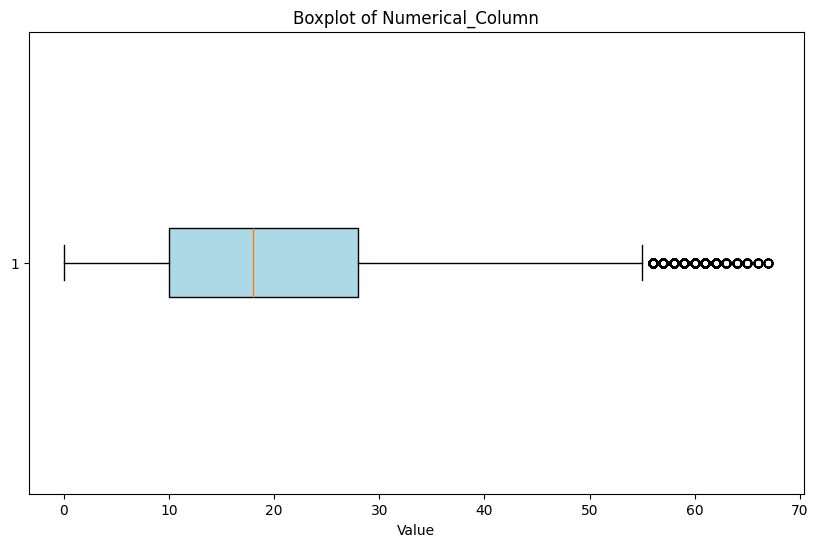

In [113]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Delay_from_due_date"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Numerical_Column")
plt.xlabel("Value")
plt.show() 
# de acordo com o gráfico valores acima de 55 estão sendo considerados outliers.

In [114]:
df.loc[df['Delay_from_due_date'] > 55, 'Delay_from_due_date'].value_counts()#.sum()

Delay_from_due_date
56    555
58    553
57    552
62    545
60    533
61    514
59    507
63     69
64     64
65     56
66     32
67     22
Name: count, dtype: int64

In [115]:
df.loc[(df['Delay_from_due_date'] > 50) & (df['Credit_Mix'] != 'Bad')]['Credit_Mix'].value_counts() 
# Após essa análise percebi que esse tempo alto de atraso está coeso pois o credit_mix de todos com valores altos ou são (Bad, Standard, ou valores nulos para serem tratados).

Credit_Mix
_           1435
Standard     751
Name: count, dtype: int64

In [116]:
df.loc[df["Num_of_Delayed_Payment"].isna()].head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5
30,0x162c,CUS_0xb891,July,Jasond,55,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,5,NaN,1.99,4.0,Good,632.46,26.056395,17 Years and 9 Months,No,16.415452,71.28367488286933,Low_spent_Large_value_payments,443.5499567906391,Standard,7
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,5,NaN,2.58,4.0,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.72539431736266,!@9#%8,288.60552234930395,Standard,1
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,9,NaN,2.58,4.0,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.000000,74.44364104999623,High_spent_Medium_value_payments,460.88727561667037,Standard,2


In [117]:
df["Num_of_Delayed_Payment"] = df['Num_of_Delayed_Payment'].str.replace(r'[^0-9]', '', regex=True)

In [118]:
df_non_na = df.loc[~df["Num_of_Delayed_Payment"].isna()]
df_non_na.loc[df["Customer_ID"] == 'CUS_0xd40'] # verificando caso exista algum contexto para o valor da coluna "Num_of_Delayed_Payment"


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,6
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,7
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,8


In [119]:
df.loc[df["Num_of_Delayed_Payment"] == 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [120]:
df["Num_of_Delayed_Payment"].fillna(0, inplace=True)

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\275878357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Num_of_Delayed_Payment"].fillna(0, inplace=True)


In [121]:
mode_num_delayed_payment = df.groupby("Customer_ID")["Num_of_Delayed_Payment"].apply(lambda x: x.mode().iloc[0]) # pegando a moda de cada Customer_id
mode_num_delayed_payment

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\557198775.py:1: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  mode_num_delayed_payment = df.groupby("Customer_ID")["Num_of_Delayed_Payment"].apply(lambda x: x.mode().iloc[0]) # pegando a moda de cada Customer_id
C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\557198775.py:1: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  mode_num_delayed_payment = df.groupby("Customer_ID")["Num_of_Delayed_Payment"].apply(lambda x: x.mode().iloc[0]) # pegando a moda de cada Customer_id


Customer_ID
CUS_0x1000    25
CUS_0x1009    18
CUS_0x100b     7
CUS_0x1011    15
CUS_0x1013     9
              ..
CUS_0xff3      9
CUS_0xff4     10
CUS_0xff6      4
CUS_0xffc     16
CUS_0xffd     12
Name: Num_of_Delayed_Payment, Length: 12500, dtype: object

In [122]:
df.loc[df["Num_of_Delayed_Payment"] == 0, 'Num_of_Delayed_Payment'] = df["Customer_ID"].map(mode_num_delayed_payment) # tratando dados pela moda de cada customer
#CUS_0xd40

In [123]:
df.loc[df["Customer_ID"] == 'CUS_0xd40'] # verificando a alteração

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,7,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,7,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,6
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,7
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,8


In [124]:
df.loc[(df["Num_of_Delayed_Payment"] == 0) & df['Delay_from_due_date'] > 0, 'Num_of_Delayed_Payment'] = 1
 # convertendo os dados que em nenhum dos casos o customer_id tinha pago algum pagamento atrasado, assim manteve o valor para 0, porém como existe um atraso na data
 # existe a necessidade de pelo menos existir 1 pagamento atrasado.

In [125]:
df.loc[(df["Num_of_Delayed_Payment"] == 1) & df['Delay_from_due_date'] > 0].head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
172,0x1702,CUS_0xa16e,May,Lee Chyenz,41,905-50-7912,Media_Manager,10183015.0,1074.584583,7,5,17,5,"Credit-Builder Loan, Mortgage Loan, Mortgage L...",51,1,7.97,6.0,Bad,1672.43,32.293490,10 Years and 5 Months,Yes,37.588073,65.83126164076859,!@9#%8,294.03912385443914,Poor,5
378,0x1838,CUS_0x75c6,March,"""John ODonnell""p",30,587-65-8904,Teacher,8721568.0,7489.973333,2,6,8,2,"Auto Loan, and Payday Loan",3,1,_,0.0,Good,680.77,31.308509,20 Years and 10 Months,No,121.682017,90.98095528937552,High_spent_Large_value_payments,776.3343613074152,Good,3
2392,0x2406,CUS_0xd83,January,Rie Ishigurot,43,214-39-6385,Lawyer,1931062.0,1630.218333,9,6,8,3,"Debt Consolidation Loan, Mortgage Loan, Studen...",47,1,12.87,10.0,Standard,1306.08,35.569120,9 Years and 8 Months,Yes,71.365096,152.25416414991176,Low_spent_Large_value_payments,209.40257307093975,Standard,1
2397,0x240b,CUS_0xd83,June,Rie Ishigurot,43,214-39-6385,Lawyer,1931062.0,1463.093138,9,6,8,5,"Debt Consolidation Loan, Mortgage Loan, Studen...",47,1,19.87,10.0,Standard,1306.08,26.235045,NaN,Yes,238.490291,67.10128288323835,Low_spent_Medium_value_payments,304.5554543376132,Poor,6
2398,0x240c,CUS_0xd83,July,Rie Ishigurot,43,214-39-6385,Lawyer,1931062.0,1463.093138,9,6,8,3,"Debt Consolidation Loan, Mortgage Loan, Studen...",43,1,_,10.0,Standard,1306.08,26.875894,10 Years and 2 Months,Yes,238.490291,123.39798909391405,Low_spent_Large_value_payments,238.2587481269375,Standard,7


In [126]:
df["Num_of_Delayed_Payment"] =  df["Num_of_Delayed_Payment"].astype(int) # conversão para tirar type object

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [128]:
#tratar coluna Changed_Credit_Limit (INICIO AQUI)
df.loc[df["Changed_Credit_Limit"].str.contains(r'[()\-_$#@!%&*]', regex=True)].tail(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
99892,0x25f4e,CUS_0x89aa,May,Kwokw,38,018-63-7005,Manager,8574412.0,7125.343333,6,7,11,2,"Auto Loan, and Debt Consolidation Loan",30,18,_,5.0,Standard,717.79,29.513156,NaN,Yes,72.099176,88.01045806206517,High_spent_Large_value_payments,792.424699,Standard,5
99900,0x25f5a,CUS_0x4986,May,Charles Abbotta,33,971-61-8388,Entrepreneur,4132956.0,3421.130000,2,3,7,1,Not Specified,1,10,-0.33999999999999986,NaN,_,1245.01,35.367709,NaN,No,20.553577,126.57612974445728,Low_spent_Medium_value_payments,474.983294,Good,5
99931,0x25f89,CUS_0xb11c,April,Yinka Adegokej,38,546-94-4789,Manager,1531965.0,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,_,6.0,Bad,1453.61,34.243058,11 Years and 0 Months,Yes,28.182033,0.0,High_spent_Large_value_payments,348.088383,Standard,4
99958,0x25fb0,CUS_0x2084,July,Ryanl,21,253-72-7758,Architect,3832139.0,3106.647859,4,4,3,4,"Student Loan, Debt Consolidation Loan, Student...",11,10,-3.41,3.0,Good,678.57,28.360351,17 Years and 5 Months,No,362.072453,182.0676508529024,Low_spent_Large_value_payments,309.10612,Standard,7
99961,0x25fb7,CUS_0x372c,February,Lucia Mutikanik,18,340-85-7301,Lawyer,4290379.0,3468.315833,8,4,6,1,Not Specified,14,0,-0.9000000000000004,1.0,Good,1079.48,33.494867,28 Years and 2 Months,No,34.975457,NaN,High_spent_Medium_value_payments,484.416627,Good,2


In [129]:
change_credit_null = df[df['Changed_Credit_Limit'].str.contains(r'[()\-_$#@!%&*]', regex=True)]
change_credit_null

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
27,0x1629,CUS_0xb891,April,Jasond,55,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,7,6,-2.01,4.0,Good,632.46,38.132348,17 Years and 6 Months,No,16.415452,272.3340373956682,Low_spent_Small_value_payments,262.4995942778403,Standard,4
28,0x162a,CUS_0xb891,May,Jasond,55,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,5,6,-1.01,4.0,Good,632.46,41.154317,17 Years and 7 Months,No,16.415452,__10000__,Low_spent_Large_value_payments,359.37491550776383,Standard,5
29,0x162b,CUS_0xb891,June,Jasond,55,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,5,6,-3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard,6
65,0x1663,CUS_0x4157,February,Charlie Zhur,23,070-19-1622,Doctor,11483841.0,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",14,8,_,3.0,Good,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.23560220847847,High_spent_Large_value_payments,785.2583558699787,Good,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99892,0x25f4e,CUS_0x89aa,May,Kwokw,38,018-63-7005,Manager,8574412.0,7125.343333,6,7,11,2,"Auto Loan, and Debt Consolidation Loan",30,18,_,5.0,Standard,717.79,29.513156,NaN,Yes,72.099176,88.01045806206517,High_spent_Large_value_payments,792.424699,Standard,5
99900,0x25f5a,CUS_0x4986,May,Charles Abbotta,33,971-61-8388,Entrepreneur,4132956.0,3421.130000,2,3,7,1,Not Specified,1,10,-0.33999999999999986,NaN,_,1245.01,35.367709,NaN,No,20.553577,126.57612974445728,Low_spent_Medium_value_payments,474.983294,Good,5
99931,0x25f89,CUS_0xb11c,April,Yinka Adegokej,38,546-94-4789,Manager,1531965.0,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,_,6.0,Bad,1453.61,34.243058,11 Years and 0 Months,Yes,28.182033,0.0,High_spent_Large_value_payments,348.088383,Standard,4
99958,0x25fb0,CUS_0x2084,July,Ryanl,21,253-72-7758,Architect,3832139.0,3106.647859,4,4,3,4,"Student Loan, Debt Consolidation Loan, Student...",11,10,-3.41,3.0,Good,678.57,28.360351,17 Years and 5 Months,No,362.072453,182.0676508529024,Low_spent_Large_value_payments,309.10612,Standard,7


In [130]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace(r'[()\-_$#@!%&*]', '', regex=True) # tirando caracteres especiais

In [131]:
change_credit_null = df[~df['Changed_Credit_Limit'].str.contains(r'[^0-9]', regex=True)]
change_credit_null # valores nulos

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
65,0x1663,CUS_0x4157,February,Charlie Zhur,23,070-19-1622,Doctor,11483841.0,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",14,8,,3.0,Good,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.23560220847847,High_spent_Large_value_payments,785.2583558699787,Good,2
66,0x1664,CUS_0x4157,March,Charlie Zhur,23,070-19-1622,Doctor,11483841.0,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,,3.0,Good,1377.74,35.141567,21 Years and 6 Months,NM,226.892792,470.3857956796373,High_spent_Small_value_payments,547.1081623988198,Good,3
109,0x16a3,CUS_0x6c66,June,Sinead Carews,39,328-33-6328,Manager,8701545.0,519.128750,6,5,8,7,"Personal Loan, Payday Loan, Student Loan, Auto...",23,6,,6.0,Standard,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613407134115,Low_spent_Medium_value_payments,242.43306442147872,Poor,6
110,0x16a4,CUS_0x6c66,July,Sinead Carews,39,328-33-6328,Manager,8701545.0,519.128750,6,5,8,7,"Personal Loan, Payday Loan, Student Loan, Auto...",21,9,,9.0,Standard,2602.69,38.465415,NaN,Yes,36.548197,30.471806299271933,Low_spent_Medium_value_payments,264.8928715293409,Poor,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,0x25d4a,CUS_0x2637,May,Diane Bartzj,28,272-33-1370,Writer,290905.0,2472.208333,5,7,20,4,"Not Specified, Mortgage Loan, Personal Loan, a...",11,17,,6.0,_,1612.7,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299066480114,High_spent_Medium_value_payments,394.379803,Poor,5
99618,0x25db4,CUS_0xae66,March,Jino,98,721-45-4479,Writer,14256036.0,11773.030000,6,3,13,1,Student Loan,24,16,,0.0,Standard,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.7874766731884,High_spent_Large_value_payments,1145.743429,Standard,3
99800,0x25ec6,CUS_0x1232,January,Lawderr,16,441-26-1297,Developer,1493749.0,1142.790833,8,8,22,7,"Student Loan, Mortgage Loan, Debt Consolidatio...",44,12,,2209.0,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.58693258712627,Low_spent_Small_value_payments,255.731272,Standard,1
99892,0x25f4e,CUS_0x89aa,May,Kwokw,38,018-63-7005,Manager,8574412.0,7125.343333,6,7,11,2,"Auto Loan, and Debt Consolidation Loan",30,18,,5.0,Standard,717.79,29.513156,NaN,Yes,72.099176,88.01045806206517,High_spent_Large_value_payments,792.424699,Standard,5


In [132]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: x if re.search(r'[^0-9]', x) else np.nan) # transformando para NaN os valores não numéricos

In [133]:
df.loc[df['Changed_Credit_Limit'].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
65,0x1663,CUS_0x4157,February,Charlie Zhur,23,070-19-1622,Doctor,11483841.0,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",14,8,NaN,3.0,Good,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.23560220847847,High_spent_Large_value_payments,785.2583558699787,Good,2
66,0x1664,CUS_0x4157,March,Charlie Zhur,23,070-19-1622,Doctor,11483841.0,9843.867500,2,5,7,3,"Personal Loan, Debt Consolidation Loan, and Au...",11,11,NaN,3.0,Good,1377.74,35.141567,21 Years and 6 Months,NM,226.892792,470.3857956796373,High_spent_Small_value_payments,547.1081623988198,Good,3
109,0x16a3,CUS_0x6c66,June,Sinead Carews,39,328-33-6328,Manager,8701545.0,519.128750,6,5,8,7,"Personal Loan, Payday Loan, Student Loan, Auto...",23,6,NaN,6.0,Standard,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613407134115,Low_spent_Medium_value_payments,242.43306442147872,Poor,6
110,0x16a4,CUS_0x6c66,July,Sinead Carews,39,328-33-6328,Manager,8701545.0,519.128750,6,5,8,7,"Personal Loan, Payday Loan, Student Loan, Auto...",21,9,NaN,9.0,Standard,2602.69,38.465415,NaN,Yes,36.548197,30.471806299271933,Low_spent_Medium_value_payments,264.8928715293409,Poor,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,0x25d4a,CUS_0x2637,May,Diane Bartzj,28,272-33-1370,Writer,290905.0,2472.208333,5,7,20,4,"Not Specified, Mortgage Loan, Personal Loan, a...",11,17,NaN,6.0,_,1612.7,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299066480114,High_spent_Medium_value_payments,394.379803,Poor,5
99618,0x25db4,CUS_0xae66,March,Jino,98,721-45-4479,Writer,14256036.0,11773.030000,6,3,13,1,Student Loan,24,16,NaN,0.0,Standard,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.7874766731884,High_spent_Large_value_payments,1145.743429,Standard,3
99800,0x25ec6,CUS_0x1232,January,Lawderr,16,441-26-1297,Developer,1493749.0,1142.790833,8,8,22,7,"Student Loan, Mortgage Loan, Debt Consolidatio...",44,12,NaN,2209.0,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.58693258712627,Low_spent_Small_value_payments,255.731272,Standard,1
99892,0x25f4e,CUS_0x89aa,May,Kwokw,38,018-63-7005,Manager,8574412.0,7125.343333,6,7,11,2,"Auto Loan, and Debt Consolidation Loan",30,18,NaN,5.0,Standard,717.79,29.513156,NaN,Yes,72.099176,88.01045806206517,High_spent_Large_value_payments,792.424699,Standard,5


In [134]:
df.groupby('Customer_ID').apply(lambda x: x[(x['Changed_Credit_Limit'].isna()) | ~(x['Changed_Credit_Limit'].isna())]) 

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\1521799855.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Customer_ID').apply(lambda x: x[(x['Changed_Credit_Limit'].isna()) | ~(x['Changed_Credit_Limit'].isna())])


ID Customer_ID     Month            Name  Age  \
Customer_ID                                                             
CUS_0x1000  56752  0x1628a  CUS_0x1000   January  Alistair Barrf   17   
            56753  0x1628b  CUS_0x1000  February  Alistair Barrf   17   
            56754  0x1628c  CUS_0x1000     March  Alistair Barrf   17   
            56755  0x1628d  CUS_0x1000     April  Alistair Barrf   17   
            56756  0x1628e  CUS_0x1000       May  Alistair Barrf   17   
...                    ...         ...       ...             ...  ...   
CUS_0xffd   99155  0x25afd   CUS_0xffd     April        Damouniq   29   
            99156  0x25afe   CUS_0xffd       May        Damouniq   29   
            99157  0x25aff   CUS_0xffd      June        Damouniq   29   
            99158  0x25b00   CUS_0xffd      July        Damouniq   30   
            99159  0x25b01   CUS_0xffd    August        Damouniq   30   

                           SSN Occupation  Annual_Income  \
Customer_ID                                                
CUS_0x1000  56752  913-74-1218     Lawyer      3062594.0   
            56753  913-74-1218     Lawyer      3062594.0   
            56754  913-74-1218     Lawyer      3062594.0   
            56755  913-74-1218     Lawyer      3062594.0   
            56756  913-74-1218     Lawyer      3062594.0   
...                        ...        ...            ...   
CUS_0xffd   99155  832-88-8320  Scientist      4139844.0   
            99156  832-88-8320  Scientist      4139844.0   
            99157  832-88-8320  Scientist      4139844.0   
            99158  832-88-8320  Scientist      4139844.0   
            99159  832-88-8320  Scientist      4139844.0   

                   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Customer_ID                                                                    
CUS_0x1000  56752            2706.161667                  6                5   
            56753            2706.161667                  6                5   
            56754            2706.161667                  6                5   
            56755            2706.161667                  6                5   
            56756            2706.161667                  6                5   
...                                  ...                ...              ...   
CUS_0xffd   99155            3749.870000                  8                7   
            99156            3749.870000                  8                7   
            99157            3749.870000                  8                7   
            99158            3749.870000                  8                7   
            99159            3749.870000                  8                7   

                   Interest_Rate  Num_of_Loan  \
Customer_ID                                     
CUS_0x1000  56752             27            2   
            56753             27            2   
            56754             27            2   
            56755             27            2   
            56756             27            2   
...                          ...          ...   
CUS_0xffd   99155             13            3   
            99156             13            6   
            99157             13            6   
            99158             13            6   
            99159             13            6   

                                                        Type_of_Loan  \
Customer_ID                                                            
CUS_0x1000  56752          Credit-Builder Loan, and Home Equity Loan   
            56753          Credit-Builder Loan, and Home Equity Loan   
            56754          Credit-Builder Loan, and Home Equity Loan   
            56755          Credit-Builder Loan, and Home Equity Loan   
            56756          Credit-Builder Loan, and Home Equity Loan   
...                                                              ...   
CUS_0xffd   99155  Auto Loan, Payday L

In [135]:
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.bfill().ffill()) 
# agrupando pelo customer_id e preenchendo o valor nulo com o valor anterior ou seguinte do mesmo customer_id

In [136]:
df.loc[df['Changed_Credit_Limit'].isna()] # verificando caso exista algum valor nulo

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [137]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float) # conversão do tipo

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [139]:
df.loc[df['Num_Credit_Inquiries'].isna()] 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,7,11.10,NaN,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good,3
47,0x1645,CUS_0x95ee,August,Np,31,612-70-8987,Lawyer,7392846.0,5988.705000,4,5,8,0,Not Specified,8,7,10.14,NaN,Good,548.2,31.580990,32 Years and 6 Months,No,0.000000,42.63559025189578,!@9#%8,796.2349097481042,Good,8
113,0x16ab,CUS_0xff4,February,Poornimaf,98,655-05-7666,Entrepreneur,2554626.0,2415.855000,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",16,13,7.83,NaN,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard,2
115,0x16ad,CUS_0xff4,April,Poornimaf,37,655-05-7666,Entrepreneur,2554626.0,2415.855000,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",16,10,7.83,NaN,Standard,758.44,35.946278,18 Years and 5 Months,Yes,101.328637,83.7147504914459,High_spent_Medium_value_payments,306.54211214470297,Standard,4
187,0x1719,CUS_0x5b48,April,McBrideq,32,706-95-0150,Lawyer,12600445.0,782.037083,5,5,10,3,"Not Specified, Student Loan, and Student Loan",25,18,15.79,NaN,Standard,569.8,28.819407,12 Years and 6 Months,Yes,33746.000000,31.14919791081519,Low_spent_Medium_value_payments,300.9941628933122,Poor,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99768,0x25e96,CUS_0xc345,January,Jeb Blountf,23,176-40-0757,Architect,6001532.0,5121.276667,7,4,14,7,"Mortgage Loan, Mortgage Loan, Credit-Builder L...",8,8,17.47,NaN,Standard,1095.15,29.272858,15 Years and 2 Months,Yes,13580.000000,136.68550948131085,High_spent_Medium_value_payments,438.433474,Standard,1
99852,0x25f12,CUS_0x3048,May,Rick Rothackeru,40,375-64-6913,Scientist,8109316.0,7017.763333,10,7,17,7,"Auto Loan, Payday Loan, Auto Loan, Student Loa...",25,20,15.72,NaN,Bad,4523.3,27.419316,9 Years and 9 Months,Yes,409.039442,741.5673328610768,Low_spent_Small_value_payments,NaN,Standard,5
99874,0x25f34,CUS_0x3855,March,Xolai,27,963-55-7106,Scientist,11867754.0,9963.795000,4,4,6,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11,9.59,NaN,_,995.47,32.808662,NaN,No,237.106366,__10000__,High_spent_Medium_value_payments,751.613048,Good,3
99900,0x25f5a,CUS_0x4986,May,Charles Abbotta,33,971-61-8388,Entrepreneur,4132956.0,3421.130000,2,3,7,1,Not Specified,1,10,0.34,NaN,_,1245.01,35.367709,NaN,No,20.553577,126.57612974445728,Low_spent_Medium_value_payments,474.983294,Good,5


In [140]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.bfill().ffill())  
# preenchendo valores nulos com o proximo ou anterior do mesmo customer_id

In [141]:
df.loc[df['Num_Credit_Inquiries'].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [142]:
df.loc[df['Num_Credit_Inquiries'], 'Num_Credit_Inquiries'].value_counts()  # verificando outliers

Num_Credit_Inquiries
4.0       66093
2.0       31863
3.0         862
1.0         164
0.0         146
7.0         140
5.0         105
8.0         105
9.0         102
6.0         102
10.0         79
11.0         78
12.0         73
13.0         30
15.0         12
14.0          8
16.0          7
1936.0        5
17.0          4
1044.0        3
1839.0        2
651.0         2
2006.0        2
1265.0        2
418.0         2
1953.0        1
76.0          1
2271.0        1
2238.0        1
568.0         1
285.0         1
2321.0        1
1241.0        1
1085.0        1
Name: count, dtype: int64

In [143]:
df.loc[df['Num_Credit_Inquiries'] > 20, 'Num_Credit_Inquiries'].value_counts() # verificando outliers

Num_Credit_Inquiries
1786.0    4
1244.0    4
1460.0    4
623.0     4
514.0     4
         ..
1951.0    1
1721.0    1
1750.0    1
2397.0    1
74.0      1
Name: count, Length: 1205, dtype: int64

In [144]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.mode().iloc[1] if len(x.mode()) > 1 else x.mode().iloc[0] if x.mode().iloc[0] <= 20 else x)

# realizando a transformação dos outliers pela moda de cada customer_id 

In [145]:
df.loc[df['Num_Credit_Inquiries'], 'Num_Credit_Inquiries'].value_counts() # verficando dados

Num_Credit_Inquiries
4.0    66224
2.0    32896
3.0      880
Name: count, dtype: int64

In [146]:
# manipulação da coluna Credit_Mix
df.loc[df['Credit_Mix'].str.contains(r'[_-]', regex=True)] # verificando dados nulos

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,3484784.0,3037.986667,2,19,6,1,Credit-Builder Loan,3,1,5.42,2.0,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard,3
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.10,3.0,_,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good,4
29,0x162b,CUS_0xb891,June,Jasond,55,072-31-6145,Entrepreneur,3068989.0,2612.490833,2,5,4,1,Not Specified,5,6,3.01,4.0,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard,6
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,3554771.0,2853.309167,7,5,5,0,Not Specified,1,15,2.58,4.0,_,943.86,28.924954,30 Years and 11 Months,Yes,0.000000,96.78548508587444,High_spent_Medium_value_payments,438.5454315807922,Standard,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,0x25fde,CUS_0x8600,May,Sarah McBridec,28,031-35-0942,Architect,2000288.0,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,9.0,_,3571.7,28.508250,6 Years and 0 Months,Yes,60.964772,213.97800979403817,Low_spent_Small_value_payments,208.047884,Standard,5
99992,0x25fe6,CUS_0x942c,January,Nicks,24,078-73-5990,Mechanic,3962899.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,1,9.50,3.0,_,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,Low_spent_Small_value_payments,189.64108,Poor,1
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,3962899.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6,9.50,3.0,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor,3
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,3962899.0,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.50,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor,4


In [147]:
df.loc[(df['Delay_from_due_date'] > 50) & (df['Credit_Mix'] != 'Bad')]['Credit_Mix'].value_counts()

Credit_Mix
_           1435
Standard     751
Name: count, dtype: int64

In [148]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [149]:
mask = (~df['Credit_Mix'].str.contains(r'[a-zA-Z]', regex=True)) & (df['Delay_from_due_date'] > 50)
df.loc[mask, 'Credit_Mix'] = 'Bad' # trocando valores nulos para bad aonde o Delay_from_due_date seja maior que 50.

In [150]:
df['Credit_Mix'].value_counts() # analisando dados restantes

Credit_Mix
Standard    36479
Good        24337
Bad         20424
_           18760
Name: count, dtype: int64

In [151]:
df.loc[~df['Credit_Mix'].str.contains(r'[a-zA-Z]', regex=True), 'Credit_Mix'] = np.nan # transformando dados nulos em np.nan

In [152]:
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.ffill().bfill())  
# preenchendo dados nulos, agrupando pelo customer_id e preenchendo com o valor anterior ou posterior do mesmo customer_id

In [153]:
df['Credit_Mix'].value_counts() # analisando dados.

Credit_Mix
Standard    45652
Good        30384
Bad         23964
Name: count, dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [155]:
#Ajustar dados Outstanding_Debt!!!
df.loc[df["Outstanding_Debt"].str.contains(r'[-_#$%¨&*]', regex=True)] 
# verificando dados incocistentes.

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
87,0x1681,CUS_0xa66b,August,Saphirj,41,221-30-8554,Teacher,3375127.0,2948.605833,5,5,20,3,"Credit-Builder Loan, Personal Loan, and Auto Loan",16,17,11.00,8.0,Standard,1328.93_,31.139484,NaN,Yes,65.008174,25.969611914778515,High_spent_Large_value_payments,443.88279713203934,Standard,8
142,0x16d4,CUS_0xfdb,July,Patrickg,46,928-91-4452,Teacher,3228462.0,2898.385000,6,7,17,6,"Credit-Builder Loan, Not Specified, Mortgage L...",7,12,9.22,10.0,Standard,1283.37_,24.205533,6 Years and 11 Months,Yes,103.037560,__10000__,Low_spent_Small_value_payments,85.90209492602362,Standard,7
368,0x182a,CUS_0x609d,January,Shupingu,27,911-47-6879,Architect,197173850.0,1057.435833,7,10,8,9,"Credit-Builder Loan, Personal Loan, Credit-Bui...",59,24,8.82,11.0,Bad,2797.17_,25.314339,13 Years and 11 Months,Yes,58.868441,60.55078556335062,High_spent_Small_value_payments,246.32435693137433,Standard,1
632,0x19b6,CUS_0x700d,January,Blenkinsopc,21,992-49-2793,Accountant,4471917.0,3969.597500,6,6,29,7,"Payday Loan, Auto Loan, Credit-Builder Loan, D...",41,19,23.21,11.0,Bad,3818.57_,30.982373,12 Years and 11 Months,Yes,248.599886,130.25122507434963,High_spent_Medium_value_payments,268.1086390702124,Poor,1
703,0x1a1d,CUS_0x71e0,August,Aruna Viswanathau,28,330-96-0638,Mechanic,1539895.0,1548.245833,1,7,5,4,"Student Loan, Mortgage Loan, Not Specified, an...",1,1,8.41,8.0,Good,343.84_,28.135688,28 Years and 10 Months,No,34.813970,95.38656229488777,Low_spent_Large_value_payments,294.6240511822009,Standard,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99842,0x25f04,CUS_0x944e,March,Vlastelicax,23,815-15-2261,Architect,11834645.0,688.220417,5,7,10,2,"Credit-Builder Loan, and Payday Loan",26,13,9.62,10.0,Standard,1095.9_,26.640584,13 Years and 5 Months,Yes,11.089575,49.00506696054661,!@9#%8,298.7274,Standard,3
99862,0x25f20,CUS_0x1285,July,Lauriay,43,540-18-1115,Architect,1069216.0,817.013333,8,4,16,0,Not Specified,17,12,10.29,4.0,Standard,1350.85_,29.759912,31 Years and 11 Months,Yes,0.000000,NaN,Low_spent_Medium_value_payments,294.609108,Standard,7
99930,0x25f88,CUS_0xb11c,March,Yinka Adegokej,38,546-94-4789,Manager,1531965.0,1460.637500,6,7,15,4,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",54,16,17.13,6.0,Bad,1453.61_,37.266724,10 Years and 11 Months,Yes,28.182033,91.56581797275696,Low_spent_Medium_value_payments,306.315899,Poor,3
99984,0x25fda,CUS_0x8600,January,Sarah McBridec,28,031-35-0942,Architect,2000288.0,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",35,26,18.31,9.0,Bad,3571.7_,22.895966,5 Years and 8 Months,Yes,60.964772,43.37067007268804,High_spent_Large_value_payments,328.655224,Poor,1


In [156]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'[-_#$%¨&*]', '', regex=True) # retirando os caracteres especiais.

In [157]:
df.loc[df["Outstanding_Debt"].str.contains(r'[-_#$%¨&*]', regex=True)] # verificando se os dados foram convertidos. 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [158]:
df['Outstanding_Debt'].value_counts() # verificando outliers.

Outstanding_Debt
1109.03    24
1151.7     24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: count, Length: 12203, dtype: int64

In [159]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float) # conversão do tipo

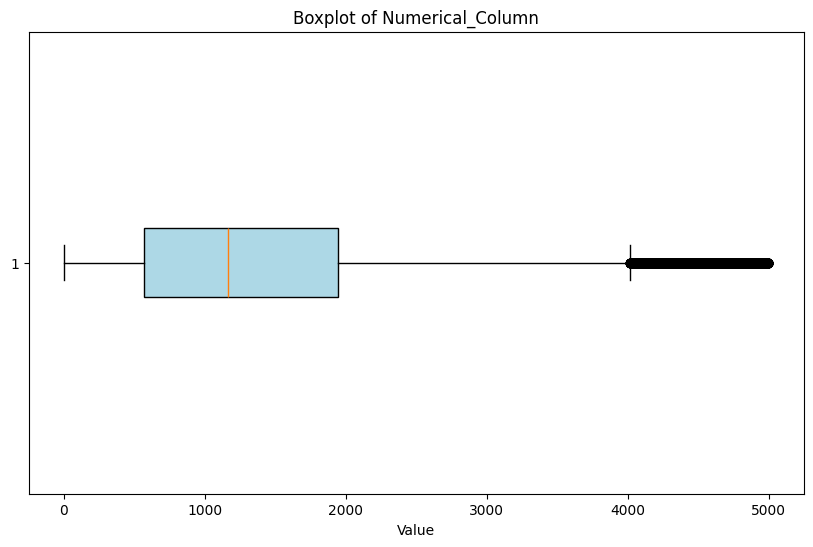

In [160]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Outstanding_Debt"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Numerical_Column")
plt.xlabel("Value")
plt.show() 


In [161]:
df.loc[df["Outstanding_Debt"] >= 4000, 'Outstanding_Debt'].value_counts()

Outstanding_Debt
4453.51    16
4300.40     8
4483.98     8
4000.40     8
4955.69     8
           ..
4355.18     8
4896.00     8
4004.45     8
4525.71     8
4523.30     8
Name: count, Length: 665, dtype: int64

In [162]:
Q1 = df['Outstanding_Debt'].quantile(0.25) # primeiro quartil (pega os valores de 25% para baixo)
Q3 = df['Outstanding_Debt'].quantile(0.75) # terceiro quartil (pega os valores de 95% para baixo)
IQR = Q3 - Q1 # calcula a diferença entre o primeiro e o terceiro quartil

In [163]:
Q1 # valores do primeiro quadrante 

566.0725

In [164]:
Q3 # valores do primeiro, segundo e terceiro quadrante 

1945.9625

In [165]:
IQR # diferença entre ambos

1379.89

In [166]:
upper_bound = Q3 + 1.5 * IQR
upper_bound # limitador de valor, se baseando também com os valores exibidos pelo gráfico

4015.7975

In [167]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x: upper_bound if x > upper_bound else x) # Alteração de outliers

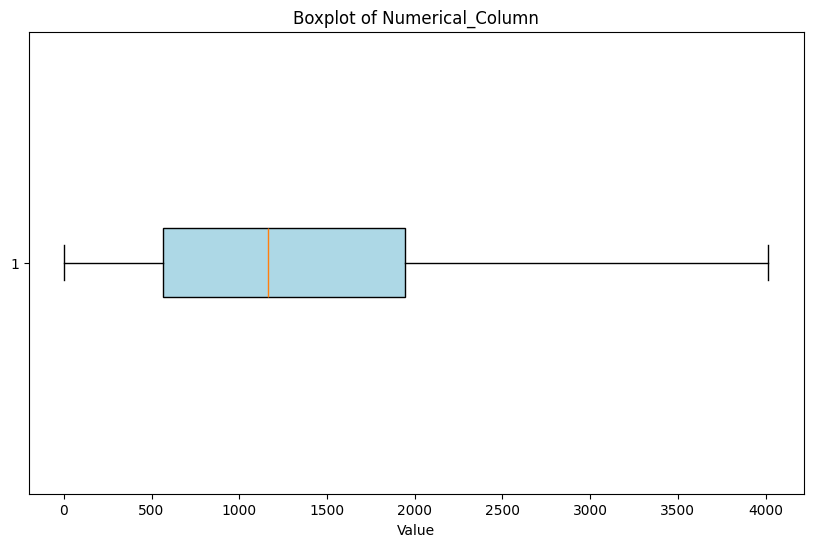

In [168]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Outstanding_Debt"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Numerical_Column")
plt.xlabel("Value")
plt.show() # verificando novamente o gráfico para outliers.

In [169]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,7,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,98,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,6.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,7,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,5


In [170]:
df.loc[df["Credit_Utilization_Ratio"].isna(), "Credit_Utilization_Ratio"]

Series([], Name: Credit_Utilization_Ratio, dtype: float64)

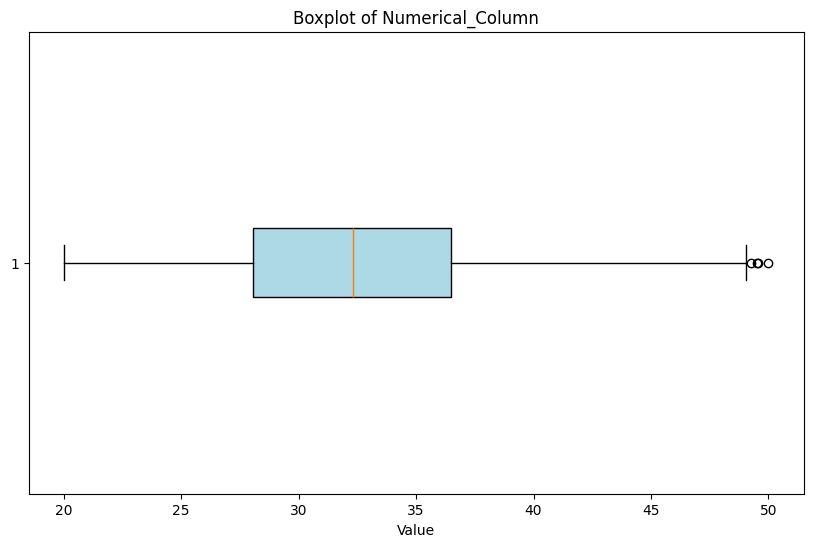

In [171]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Credit_Utilization_Ratio"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Numerical_Column")
plt.xlabel("Value")
plt.show() # verificando outliers

In [172]:
df.loc[df["Credit_Utilization_Ratio"] > 48, 'Credit_Utilization_Ratio'].value_counts()

Credit_Utilization_Ratio
48.247003    1
50.000000    1
49.522324    1
48.176599    1
48.489852    1
48.023249    1
49.254983    1
49.564519    1
48.199824    1
48.191749    1
49.064277    1
48.337291    1
Name: count, dtype: int64

In [173]:
len(df.loc[df["Credit_Utilization_Ratio"] > 48, 'Credit_Utilization_Ratio'].value_counts()) # apenas 12 valores fora do comum.

12

In [174]:
df.loc[df["Credit_History_Age"].isna()].head() # verificando valores nulos

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",1,7,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,2
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,1911412.0,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,8
19,0x161d,CUS_0x2dbc,April,Langep,34,486-85-3974,Engineer,14316264.0,12187.220000,1,5,8,3,"Auto Loan, Auto Loan, and Not Specified",8,5,9.10,3.0,Good,1303.01,39.501648,NaN,No,246.992319,825.2162699393922,Low_spent_Medium_value_payments,426.5134106068658,Good,4
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,7392846.0,5988.705000,4,19,8,0,Not Specified,12,10,10.14,2.0,Good,548.20,39.962685,NaN,No,15015.000000,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good,1
42,0x1640,CUS_0x95ee,March,Np,31,612-70-8987,Lawyer,7392846.0,5988.705000,4,5,8,0,Not Specified,8,7,10.14,2.0,Good,548.20,40.712187,NaN,No,0.000000,150.05973429800815,High_spent_Medium_value_payments,698.8107657019921,Good,3


In [175]:
df.loc[df["Customer_ID"] == "CUS_0xd40", "Credit_History_Age"] # escolhendo um Customer_id e verificando se ele possui registros válidos

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
6    22 Years and 7 Months
7                      NaN
Name: Credit_History_Age, dtype: object

In [176]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.bfill().ffill()) 
# transformando os dados nulos por dados válidos de seu respectivo Customer_id.

In [177]:
df.loc[df["Customer_ID"] == "CUS_0xd40", "Credit_History_Age"]

0    22 Years and 1 Months
1    22 Years and 3 Months
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
6    22 Years and 7 Months
7    22 Years and 7 Months
Name: Credit_History_Age, dtype: object

In [178]:
df.loc[df["Credit_History_Age"].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [179]:
def modify_month(df_group):
    for i in range(len(df_group)):
        # realizando um iloc através da posição (index), e realizando a divisão utilizando o and.
        parts = df_group.iloc[i]['Credit_History_Age'].split(' and ')
        # Modificar a segunda parte da string
        months_part = parts[1].split()
        months_part[0] = str(i + 1) # adicionando o valor para o mês com o índice mais 1.
        # concatenando a string
        df_group.at[df_group.index[i], 'Credit_History_Age'] = f"{parts[0]} and {' '.join(months_part)}"
    return df_group

In [180]:
df = df.groupby('Customer_ID').apply(modify_month).reset_index(drop=True) # chamando a função criada para realizar as alterações

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\473606065.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Customer_ID').apply(modify_month).reset_index(drop=True) # chamando a função criada para realizar as alterações


In [181]:
df.loc[df["Customer_ID"] == "CUS_0xd40", "Credit_History_Age"] # verificando se os dados foram alterados corretamente.

98560    22 Years and 1 Months
98561    22 Years and 2 Months
98562    22 Years and 3 Months
98563    22 Years and 4 Months
98564    22 Years and 5 Months
98565    22 Years and 6 Months
98566    22 Years and 7 Months
98567    22 Years and 8 Months
Name: Credit_History_Age, dtype: object

In [225]:
# fazer alteração da string para uma data
def convert_to_datetime(duration_str):
    
    #realizando a divisão em 2 grupos, o primeiro com o valor do ano e o segundo com o valor do Mês
    match = re.match(r'(\d+) Years and (\d+) Months', duration_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
    
    
    base_date = datetime.now()
    
    # Realizando a diferença entre a data atual e a data de ingressão do usuário.
    new_date = base_date - timedelta(days=years*365 + months*30)
    
    # Retornar a data no formato YYYY-MM
    return new_date.strftime('%Y-%m')

In [226]:
df['Credit_History_Age_Date'] = df['Credit_History_Age'].apply(convert_to_datetime) # aplicando a função e criando uma nova coluna no dataframe.

In [231]:
#analisando o dtype da coluna
df['Credit_History_Age_Date'].dtype
#type object

dtype('O')

In [228]:
new_column_order = ['ID', 'Customer_ID', 'Month', 'Number_Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                    'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
                    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Credit_History_Age_Date', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
                    'Monthly_Balance', 'Credit_Score']


df = df[new_column_order] # alterando a ordem das colunas para facilitar a visualização.

In [229]:
df.head()

,ID,Customer_ID,Month,Number_Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Credit_History_Age_Date,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1628a,CUS_0x1000,January,1,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62,25,1.63,11.0,Bad,1562.91,26.612093,10 Years and 1 Months,2014-05,1,244.750283,Low_spent_Large_value_payments,252.924793,Standard
1,0x1628b,CUS_0x1000,February,2,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62,23,1.63,11.0,Bad,1562.91,29.439759,10 Years and 2 Months,2014-04,1,176.132567,High_spent_Small_value_payments,311.542510,Poor
2,0x1628c,CUS_0x1000,March,3,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62,28,1.63,11.0,Bad,1562.91,38.285928,10 Years and 3 Months,2014-03,1,109.056519,High_spent_Medium_value_payments,368.618557,Poor
3,0x1628d,CUS_0x1000,April,4,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",64,25,1.63,11.0,Bad,1562.91,32.843081,10 Years and 4 Months,2014-02,1,87.909909,Low_spent_Large_value_payments,419.765167,Poor
4,0x1628e,CUS_0x1000,May,5,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",67,25,2.63,11.0,Bad,1562.91,32.330508,10 Years and 5 Months,2014-01,1,191.834767,Low_spent_Large_value_payments,305.840309,Poor


In [182]:
df.loc[df["Payment_of_Min_Amount"].isna(), 'Payment_of_Min_Amount'] 

Series([], Name: Payment_of_Min_Amount, dtype: object)

In [183]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [184]:
df.loc[df["Payment_of_Min_Amount"].str.contains("NM")] 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
8,0x66a2,CUS_0x1009,January,Arunah,25,063-67-6938,Mechanic,5.231268e+06,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",8,1749,9.73,4.0,Standard,202.68,23.679534,30 Years and 1 Months,NM,108.366467,261.2109793689318,Low_spent_Medium_value_payments,335.4615535058126,Standard,1
22,0x1efc,CUS_0x100b,July,Shirboni,19,238-62-0395,Media_Manager,1.137814e+16,9549.782500,1,4,1,0,Not Specified,10,7,11.34,1.0,Good,1030.20,29.174795,15 Years and 7 Months,NM,0.000000,174.28759775147847,High_spent_Large_value_payments,1020.6906522485216,Standard,7
28,0x1764a,CUS_0x1011,May,Schneyerh,44,793-05-8223,Doctor,5.891847e+06,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,15,14.42,7.0,Standard,473.14,28.646798,15 Years and 5 Months,NM,123.434939,560.9970828436582,Low_spent_Small_value_payments,126.45522835999878,Standard,5
33,0x243eb,CUS_0x1013,February,Cameront,43,930-49-9615,Mechanic,9.862098e+06,7962.415000,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",12,9,4.33,3.0,Good,1233.51,29.555017,17 Years and 2 Months,NM,228.018084,316.7494983013805,High_spent_Medium_value_payments,501.4739180458856,Standard,2
46,0x1941c,CUS_0x1015,July,Holtono,27,810-97-7024,Journalist,4.695102e+06,3725.585000,7,4,16,0,Not Specified,8,9,15.83,9.0,Standard,340.22,38.453661,21 Years and 7 Months,NM,0.000000,459.55196697763785,!@9#%8,203.0065330223621,Good,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99925,0x1febf,CUS_0xfdf,June,Zhua,56,099-84-4997,Mechanic,7.011438e+06,5679.865000,8,4,12,3,"Home Equity Loan, Auto Loan, and Home Equity Loan",1,0,9.90,3.0,Good,918.89,38.624529,25 Years and 6 Months,NM,131.472173,373.8308953616916,Low_spent_Large_value_payments,332.6834318872818,Standard,6
99935,0x1f135,CUS_0xfe3,August,Mikew,53,868-17-6573,Media_Manager,4.038018e+06,3607.015000,7,5,18,4,"Personal Loan, Personal Loan, Not Specified, a...",28,14,7.98,3.0,Standard,1042.93,32.650745,24 Years and 8 Months,NM,79.986275,295.5283254153692,Low_spent_Small_value_payments,275.18690002829317,Standard,8
99946,0x1c2b0,CUS_0xfe5,March,Patrickt,38,138-97-1797,Doctor,9.696021e+06,7934.017500,6,4,8,0,Not Specified,24,17,6.52,6.0,Standard,1144.73,36.791950,22 Years and 3 Months,NM,0.000000,273.09363360169937,High_spent_Medium_value_payments,770.3081163983006,Standard,3
99954,0x18830,CUS_0xfea,March,Ethanj,33,731-85-6329,Manager,4.426441e+06,3755.700833,3,3,6,2,"Student Loan, and Student Loan",11,5,9.66,3.0,Good,1312.23,37.594973,18 Years and 3 Months,NM,40.482424,295.53779872027746,Low_spent_Medium_value_payments,319.5498607980333,Good,3


In [185]:
df.loc[df["Customer_ID"] == "CUS_0x21b1", "Payment_of_Min_Amount"] # escolhendo um Customer_id e verificando se ele possui registros válidos

8528    No
8529    No
8530    No
8531    No
8532    No
8533    No
8534    NM
8535    No
Name: Payment_of_Min_Amount, dtype: object

In [186]:
df.loc[df['Payment_of_Min_Amount'].str.contains("NM"), 'Payment_of_Min_Amount'] = np.nan # transformando valores NM para NaN 

In [187]:
df['Payment_of_Min_Amount'] = df.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: x.bfill().ffill()) 
# transformando os dados nulos por dados válidos de seu respectivo Customer_id.

In [188]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    59432
No     40568
Name: count, dtype: int64

In [189]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0}) # transformando os dados para binário

In [190]:
df['Payment_of_Min_Amount'].astype(int) # conversão da coluna para int

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: Payment_of_Min_Amount, Length: 100000, dtype: int32

In [191]:
df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
1    59432
0    40568
Name: count, dtype: int64

In [192]:
df = df.drop(columns=['Total_EMI_per_month']) # retirando a coluna pois possuem muitos valores nulos e irá atrapalhar na análise.

In [193]:
df.loc[df["Amount_invested_monthly"].isna()] #verificando valores nulos

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
18,0x1ef8,CUS_0x100b,March,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.782500,1,4,1,0,Not Specified,19,7,11.34,1.0,Good,1030.20,43.829630,15 Years and 3 Months,0,NaN,High_spent_Large_value_payments,962.5677054168697,Poor,3
43,0x19419,CUS_0x1015,April,Holtono,27,810-97-7024,Journalist,4.695102e+06,3725.585000,7,4,16,0,Not Specified,6,9,15.83,9.0,Standard,340.22,35.026728,21 Years and 4 Months,1,NaN,High_spent_Medium_value_payments,470.8164817369889,Good,4
44,0x1941a,CUS_0x1015,May,Holtono,98,810-97-7024,Journalist,4.695102e+06,3725.585000,7,4,16,0,Not Specified,8,9,15.83,9.0,Standard,340.22,30.891343,21 Years and 5 Months,1,NaN,Low_spent_Medium_value_payments,392.44815328340775,Good,5
52,0x1f6de,CUS_0x1018,May,Felsenthalq,15,731-19-8119,Accountant,1.711749e+08,5014.567500,7,7,23,8,"Credit-Builder Loan, Payday Loan, Home Equity ...",24,22,28.63,8.0,Bad,2773.09,25.492699,14 Years and 5 Months,1,NaN,Low_spent_Small_value_payments,NaN,Poor,5
58,0x1dedc,CUS_0x1026,March,Josephv,51,500-62-9044,Manager,1.706143e+07,14463.856667,2,6,9,2,"Payday Loan, and Auto Loan",0,2,0.73,3.0,Good,849.69,33.052552,20 Years and 3 Months,0,NaN,High_spent_Large_value_payments,1306.8931693170946,Standard,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99776,0xb44e,CUS_0xf9e,January,Anirbanj,42,252-30-3555,Teacher,1.424753e+07,12013.943333,8,5,11,2,"Mortgage Loan, and Home Equity Loan",22,18,1.65,1.0,Good,628.57,29.240186,30 Years and 1 Months,0,NaN,Low_spent_Medium_value_payments,322.93219324949814,Good,1
99793,0xadef,CUS_0xfa4,February,Ferrarot,40,380-95-6875,Manager,1.503519e+06,1214.932500,9,5,16,5,"Not Specified, Payday Loan, Auto Loan, Mortgag...",61,20,4.98,12.0,Bad,1447.52,31.852522,12 Years and 2 Months,1,NaN,High_spent_Small_value_payments,286.1502550028008,Poor,2
99854,0x12090,CUS_0xfb6,July,Leah Schnurrj,21,668-25-6453,Accountant,4.216591e+06,3658.825833,4,3,7,0,Not Specified,2,12,7.73,6.0,Good,981.66,33.658050,30 Years and 7 Months,0,NaN,High_spent_Large_value_payments,556.7437863307066,Standard,7
99869,0x1fd57,CUS_0xfbd,June,Scott Malonek,39,208-16-6908,Manager,6.411051e+06,5217.542500,8,4,6,1,Mortgage Loan,20,19,19.62,7.0,Standard,174.22,36.409039,6 Years and 6 Months,1,NaN,High_spent_Large_value_payments,690.6950620233948,Standard,6


In [194]:
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.bfill().ffill())  
#preenchendo valores nulos com valores respectivos de acordo com seu customer_id.

In [195]:
df.loc[df["Amount_invested_monthly"].str.contains(r'[-_#$%¨&*]', regex=True)]
#verificando caso exista algum valor incosistente.

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
18,0x1ef8,CUS_0x100b,March,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.782500,1,4,1,0,Not Specified,19,7,11.34,1.0,Good,1030.2000,43.829630,15 Years and 3 Months,0,__10000__,High_spent_Large_value_payments,962.5677054168697,Poor,3
19,0x1ef9,CUS_0x100b,April,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.782500,1,4,1,0,Not Specified,14,7,11.34,1.0,Good,1030.2000,31.016086,15 Years and 4 Months,0,__10000__,High_spent_Large_value_payments,969.7201635239168,Standard,4
27,0x17649,CUS_0x1011,April,Schneyerh,44,793-05-8223,Doctor,5.891847e+06,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,15,14.42,7.0,Standard,473.1400,29.198639,15 Years and 4 Months,1,__10000__,Low_spent_Medium_value_payments,176.4029215161516,Standard,4
114,0x1ca90,CUS_0x1041,March,Jonathan Stempela,15,675-80-2033,Teacher,8.978110e+05,894.175833,8,8,30,9,"Payday Loan, Mortgage Loan, Payday Loan, Mortg...",50,17,18.48,10.0,Bad,4015.7975,34.594482,10 Years and 3 Months,1,__10000__,Low_spent_Small_value_payments,245.2206457267369,Standard,3
199,0x12049,CUS_0x105c,August,Lopezz,98,998-18-7252,Journalist,1.276176e+06,10596.800000,8,4,5,3,"Not Specified, Mortgage Loan, and Payday Loan",3,6,12.22,0.0,Good,542.9100,39.877368,24 Years and 8 Months,0,__10000__,High_spent_Medium_value_payments,861.6006703641515,Standard,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99878,0x20a60,CUS_0xfc9,July,Lynn Adlerr,34,264-17-8777,Architect,1.729042e+06,1426.868333,6,4,8,7,"Payday Loan, Student Loan, Student Loan, Debt ...",4,14,16.86,12.0,Standard,1594.6600,38.139134,14 Years and 7 Months,1,__10000__,Low_spent_Small_value_payments,298.217459278148,Poor,7
99910,0x16d4,CUS_0xfdb,July,Patrickg,46,928-91-4452,Teacher,3.228462e+06,2898.385000,6,7,17,6,"Credit-Builder Loan, Not Specified, Mortgage L...",7,12,9.22,10.0,Standard,1283.3700,24.205533,6 Years and 7 Months,1,__10000__,Low_spent_Small_value_payments,85.90209492602362,Standard,7
99936,0x3a32,CUS_0xfe4,January,Sarah McBriden,29,075-63-9119,Writer,1.105757e+07,9009.643333,7,3,6,7,"Credit-Builder Loan, Debt Consolidation Loan, ...",7,13,18.53,10.0,Standard,788.5900,31.722013,17 Years and 1 Months,1,__10000__,High_spent_Large_value_payments,486.8582050823723,Standard,1
99978,0xfab8,CUS_0xff6,March,Shieldsb,18,541-92-8371,Doctor,1.176399e+07,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,4,10.40,2.0,Good,338.3000,28.432276,24 Years and 3 Months,0,__10000__,!@9#%8,936.5327602814987,Standard,3


In [196]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'[-_#$%¨&*]', '', regex=True) # retirando os caracteres especiais.

In [197]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float) # convertendo o dtype

In [198]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
0,0x1628a,CUS_0x1000,January,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62,25,1.63,11.0,Bad,1562.91,26.612093,10 Years and 1 Months,1,244.750283,Low_spent_Large_value_payments,252.9247932365056,Standard,1
1,0x1628b,CUS_0x1000,February,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62,23,1.63,11.0,Bad,1562.91,29.439759,10 Years and 2 Months,1,176.132567,High_spent_Small_value_payments,311.542509588218,Poor,2
2,0x1628c,CUS_0x1000,March,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",62,28,1.63,11.0,Bad,1562.91,38.285928,10 Years and 3 Months,1,109.056519,High_spent_Medium_value_payments,368.61855747932816,Poor,3
3,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",64,25,1.63,11.0,Bad,1562.91,32.843081,10 Years and 4 Months,1,87.909909,!@9#%8,419.7651674292397,Poor,4
4,0x1628e,CUS_0x1000,May,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",67,25,2.63,11.0,Bad,1562.91,32.330508,10 Years and 5 Months,1,191.834767,Low_spent_Large_value_payments,305.8403087451377,Poor,5


In [199]:
df['Amount_invested_monthly'].value_counts() # verificando outliers

Amount_invested_monthly
10000.000000    4523
0.000000         171
619.952805         4
133.530087         4
62.147569          4
                ... 
219.815350         1
637.410480         1
402.909005         1
156.911966         1
42.575720          1
Name: count, Length: 91049, dtype: int64

In [200]:
df.loc[df['Amount_invested_monthly'] == 10000 ].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
18,0x1ef8,CUS_0x100b,March,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.782500,1,4,1,0,Not Specified,19,7,11.34,1.0,Good,1030.2000,43.829630,15 Years and 3 Months,0,10000.0,High_spent_Large_value_payments,962.5677054168697,Poor,3
19,0x1ef9,CUS_0x100b,April,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.782500,1,4,1,0,Not Specified,14,7,11.34,1.0,Good,1030.2000,31.016086,15 Years and 4 Months,0,10000.0,High_spent_Large_value_payments,969.7201635239168,Standard,4
27,0x17649,CUS_0x1011,April,Schneyerh,44,793-05-8223,Doctor,5.891847e+06,5208.872500,3,3,17,3,"Student Loan, Credit-Builder Loan, and Debt Co...",27,15,14.42,7.0,Standard,473.1400,29.198639,15 Years and 4 Months,1,10000.0,Low_spent_Medium_value_payments,176.4029215161516,Standard,4
114,0x1ca90,CUS_0x1041,March,Jonathan Stempela,15,675-80-2033,Teacher,8.978110e+05,894.175833,8,8,30,9,"Payday Loan, Mortgage Loan, Payday Loan, Mortg...",50,17,18.48,10.0,Bad,4015.7975,34.594482,10 Years and 3 Months,1,10000.0,Low_spent_Small_value_payments,245.2206457267369,Standard,3
199,0x12049,CUS_0x105c,August,Lopezz,98,998-18-7252,Journalist,1.276176e+06,10596.800000,8,4,5,3,"Not Specified, Mortgage Loan, and Payday Loan",3,6,12.22,0.0,Good,542.9100,39.877368,24 Years and 8 Months,0,10000.0,High_spent_Medium_value_payments,861.6006703641515,Standard,8


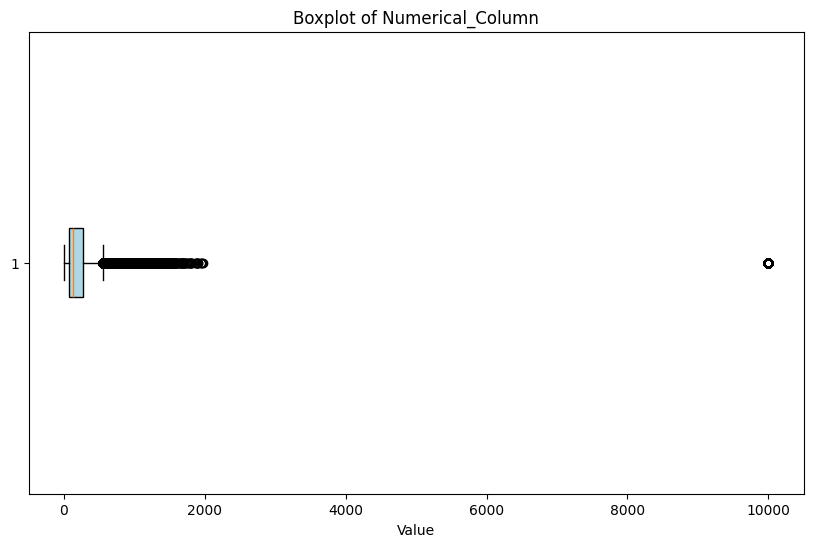

In [201]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Amount_invested_monthly"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Numerical_Column")
plt.xlabel("Value")
plt.show() # verificando outliers

In [202]:
Q1 = df['Amount_invested_monthly'].quantile(0.25) # primeiro quartil (pega os valores de 25% para baixo)
Q3 = df['Amount_invested_monthly'].quantile(0.75) # terceiro quartil (pega os valores de 75% para baixo)
IQR = Q3 - Q1 # calcula a diferença entre o primeiro e o terceiro quartil

In [203]:
Q1

74.59531314327549

In [204]:
Q3

266.1433329903073

In [205]:
IQR

191.54801984703178

In [206]:
upper_bound = Q3 + 1.5 * IQR
upper_bound # limitador

553.465362760855

In [207]:
df.loc[df['Amount_invested_monthly'] > upper_bound].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
17,0x1ef7,CUS_0x100b,February,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.7825,1,4,1,0,Not Specified,14,9,11.34,1.0,Good,1030.2,35.947655,15 Years and 2 Months,0,661.624048,Low_spent_Large_value_payments,563.3542020601286,Poor,2
18,0x1ef8,CUS_0x100b,March,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.7825,1,4,1,0,Not Specified,19,7,11.34,1.0,Good,1030.2,43.829630,15 Years and 3 Months,0,10000.000000,High_spent_Large_value_payments,962.5677054168697,Poor,3
19,0x1ef9,CUS_0x100b,April,Shirboni,18,238-62-0395,Media_Manager,1.137814e+16,9549.7825,1,4,1,0,Not Specified,14,7,11.34,1.0,Good,1030.2,31.016086,15 Years and 4 Months,0,10000.000000,High_spent_Large_value_payments,969.7201635239168,Standard,4
20,0x1efa,CUS_0x100b,May,Shirboni,19,238-62-0395,Media_Manager,1.137814e+16,9549.7825,1,4,1,0,Not Specified,9,7,11.34,1.0,Good,1030.2,32.035662,15 Years and 5 Months,0,758.083195,Low_spent_Small_value_payments,486.8950545079987,Poor,5
23,0x1efd,CUS_0x100b,August,Shirboni,19,238-62-0395,Media_Manager,1.137814e+16,9549.7825,1,4,1,0,Not Specified,14,8,8.34,1.0,Good,1030.2,28.592943,15 Years and 8 Months,0,617.079267,High_spent_Small_value_payments,597.8989834797281,Standard,8


In [208]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(lambda x:  upper_bound if x > upper_bound else x) # Alteração de outliers

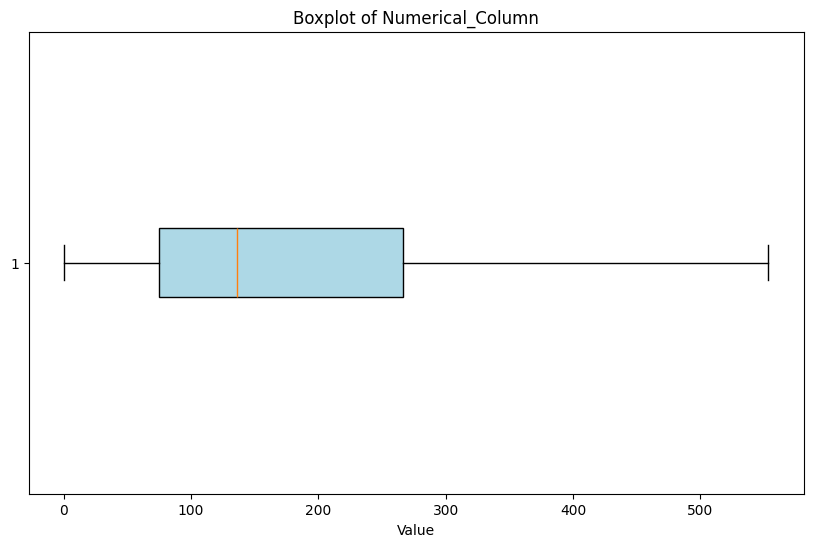

In [209]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["Amount_invested_monthly"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Numerical_Column")
plt.xlabel("Value")
plt.show() # verificando outliers

In [210]:
df['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
553.465363    10576
0.000000        171
158.002959        4
175.558216        4
133.530087        4
              ...  
91.664240         1
42.797259         1
197.312344        1
266.550713        1
42.575720         1
Name: count, Length: 85281, dtype: int64

In [211]:
df.loc[df["Payment_Behaviour"].str.contains(r'[#$%¨&*]', regex=True)] #verificando valores incosistentes

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
3,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,3.062594e+06,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",64,25,1.63,11.0,Bad,1562.91,32.843081,10 Years and 4 Months,1,87.909909,!@9#%8,419.7651674292397,Poor,4
13,0x66a7,CUS_0x1009,June,Arunah,26,063-67-6938,Mechanic,5.231268e+06,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",3,18,9.73,4.0,Standard,202.68,30.608990,30 Years and 6 Months,1,150.795934,!@9#%8,445.87659854880053,Standard,6
34,0x243ec,CUS_0x1013,March,Cameront,44,930-49-9615,Mechanic,9.862098e+06,7962.415000,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",16,9,1.33,3.0,Good,1233.51,29.657023,17 Years and 3 Months,0,323.428128,!@9#%8,524.795288453108,Standard,3
46,0x1941c,CUS_0x1015,July,Holtono,27,810-97-7024,Journalist,4.695102e+06,3725.585000,7,4,16,0,Not Specified,8,9,15.83,9.0,Standard,340.22,38.453661,21 Years and 7 Months,1,459.551967,!@9#%8,203.0065330223621,Good,7
50,0x1f6dc,CUS_0x1018,March,Felsenthalq,15,731-19-8119,Accountant,6.119481e+06,5014.567500,7,7,23,8,"Credit-Builder Loan, Payday Loan, Home Equity ...",24,22,28.63,8.0,Bad,2773.09,36.451406,13 Years and 3 Months,1,420.130358,!@9#%8,135.9577007568359,Poor,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99901,0x1d06f,CUS_0xfd1,June,Frewy,32,389-55-6408,Architect,7.866657e+15,6485.547500,3,4,17,4,"Not Specified, Personal Loan, Home Equity Loan...",29,13,1.37,3.0,Standard,1498.70,31.796510,22 Years and 6 Months,0,58.496994,!@9#%8,582.2066110456252,Standard,6
99915,0x23e5,CUS_0xfdd,April,Leikau,14,977-98-5964,Scientist,3.212824e+06,2693.353333,6,4,12,7,"Mortgage Loan, Personal Loan, Mortgage Loan, M...",19,20,10.61,8.0,Standard,465.04,27.966675,7 Years and 4 Months,1,212.718426,!@9#%8,223.16069456907783,Standard,4
99937,0x3a33,CUS_0xfe4,February,Sarah McBriden,29,075-63-9119,Writer,1.105757e+07,9009.643333,7,3,6,7,"Credit-Builder Loan, Debt Consolidation Loan, ...",7,14,22.53,10.0,Standard,788.59,39.645001,17 Years and 2 Months,1,553.465363,!@9#%8,NaN,Standard,2
99978,0xfab8,CUS_0xff6,March,Shieldsb,18,541-92-8371,Doctor,1.176399e+07,9727.326667,5,6,1,2,"Home Equity Loan, and Auto Loan",1,4,10.40,2.0,Good,338.30,28.432276,24 Years and 3 Months,0,553.465363,!@9#%8,936.5327602814987,Standard,3


In [212]:
df.loc[df["Payment_Behaviour"].str.contains(r'[#$%¨&*]', regex=True), 'Payment_Behaviour'] = np.nan # transformando para nulos

In [213]:
df.loc[df["Payment_Behaviour"].isna()].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
3,0x1628d,CUS_0x1000,April,Alistair Barrf,17,913-74-1218,Lawyer,3062594.0,2706.161667,6,5,27,2,"Credit-Builder Loan, and Home Equity Loan",64,25,1.63,11.0,Bad,1562.91,32.843081,10 Years and 4 Months,1,87.909909,NaN,419.7651674292397,Poor,4
13,0x66a7,CUS_0x1009,June,Arunah,26,063-67-6938,Mechanic,5231268.0,4250.390000,6,5,17,4,"Not Specified, Home Equity Loan, Credit-Builde...",3,18,9.73,4.0,Standard,202.68,30.608990,30 Years and 6 Months,1,150.795934,NaN,445.87659854880053,Standard,6
34,0x243ec,CUS_0x1013,March,Cameront,44,930-49-9615,Mechanic,9862098.0,7962.415000,3,3,6,3,"Student Loan, Debt Consolidation Loan, and Per...",16,9,1.33,3.0,Good,1233.51,29.657023,17 Years and 3 Months,0,323.428128,NaN,524.795288453108,Standard,3
46,0x1941c,CUS_0x1015,July,Holtono,27,810-97-7024,Journalist,4695102.0,3725.585000,7,4,16,0,Not Specified,8,9,15.83,9.0,Standard,340.22,38.453661,21 Years and 7 Months,1,459.551967,NaN,203.0065330223621,Good,7
50,0x1f6dc,CUS_0x1018,March,Felsenthalq,15,731-19-8119,Accountant,6119481.0,5014.567500,7,7,23,8,"Credit-Builder Loan, Payday Loan, Home Equity ...",24,22,28.63,8.0,Bad,2773.09,36.451406,13 Years and 3 Months,1,420.130358,NaN,135.9577007568359,Poor,3


In [214]:
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.bfill().ffill()) # Preencher os valores nulos com os valores corretos

In [215]:
df.loc[df["Payment_Behaviour"].isna()].head() # alteração bem sucedida.

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [216]:
df.loc[df["Monthly_Balance"].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month
52,0x1f6de,CUS_0x1018,May,Felsenthalq,15,731-19-8119,Accountant,171174860.0,5014.567500,7,7,23,8,"Credit-Builder Loan, Payday Loan, Home Equity ...",24,22,28.63,8.0,Bad,2773.09,25.492699,14 Years and 5 Months,1,319.985973,Low_spent_Small_value_payments,NaN,Poor,5
183,0x1eb71,CUS_0x1057,August,David Sheppardv,46,741-07-3912,Writer,8661716.0,7250.096667,8,4,6,3,"Auto Loan, Student Loan, and Payday Loan",16,21,7.26,4.0,Standard,718.53,35.555540,24 Years and 8 Months,0,553.465363,High_spent_Large_value_payments,NaN,Good,8
335,0xc99d,CUS_0x10b3,August,Johnsona,48,293-45-3004,Mechanic,1361506.0,11127.883333,1,5,9,3,"Student Loan, Student Loan, and Auto Loan",10,3,10.72,3.0,Good,260.29,35.958595,27 Years and 8 Months,0,553.465363,Low_spent_Small_value_payments,NaN,Good,8
378,0x73d0,CUS_0x10dd,March,Praveen Menonq,25,907-60-4113,Teacher,1056456.0,9090.800000,5,4,5,4,"Credit-Builder Loan, Student Loan, Payday Loan...",31,19,2.41,1.0,Standard,1336.91,30.599295,20 Years and 3 Months,0,553.465363,Low_spent_Small_value_payments,NaN,Standard,3
670,0x104dc,CUS_0x1155,July,Wohld,41,189-76-0870,Developer,15848348.0,12927.956667,2,1,6,3,"Home Equity Loan, Payday Loan, and Personal Loan",3,3,5.65,4.0,Good,471.82,38.116881,28 Years and 7 Months,0,553.465363,Low_spent_Small_value_payments,NaN,Good,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99715,0x63c9,CUS_0xf79,April,Zeidlern,56,798-34-6017,Media_Manager,17601516.0,14855.930000,2,6,12,0,Not Specified,8,6,9.15,3.0,Good,1471.36,22.476023,29 Years and 4 Months,0,553.465363,Low_spent_Small_value_payments,NaN,Good,4
99807,0x19465,CUS_0xfa7,August,Joseph Axe,35,703-73-1678,Entrepreneur,1236650.0,10145.416667,2,7,8,4,"Student Loan, Not Specified, Home Equity Loan,...",6,6,1.38,1.0,Good,561.42,36.572654,23 Years and 8 Months,0,553.465363,Low_spent_Small_value_payments,NaN,Standard,8
99937,0x3a33,CUS_0xfe4,February,Sarah McBriden,29,075-63-9119,Writer,11057572.0,9009.643333,7,3,6,7,"Credit-Builder Loan, Debt Consolidation Loan, ...",7,14,22.53,10.0,Standard,788.59,39.645001,17 Years and 2 Months,1,553.465363,High_spent_Medium_value_payments,NaN,Standard,2
99941,0x3a37,CUS_0xfe4,June,Sarah McBriden,29,075-63-9119,Writer,11057572.0,9009.643333,7,3,6,7,"Credit-Builder Loan, Debt Consolidation Loan, ...",7,13,19.53,10.0,Standard,788.59,26.483192,17 Years and 6 Months,1,553.465363,Low_spent_Small_value_payments,NaN,Standard,6


In [217]:
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.bfill().ffill()) # Preencher os valores nulos com os valores corretos

C:\Users\vinic\AppData\Local\Temp\ipykernel_17084\208706947.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.bfill().ffill()) # Preencher os valores nulos com os valores corretos


In [218]:
df.loc[df["Monthly_Balance"].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Number_Month


In [219]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[-_#$%¨&*]', '', regex=True) # retirando os caracteres especiais.

In [220]:
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float) # convertendo para o dtype float

In [221]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
3.333333e+26    9
2.449911e+02    5
3.466417e+02    4
2.701000e+02    4
6.630541e+01    4
               ..
6.550823e+02    1
5.518668e+02    1
5.954171e+02    1
6.565489e+02    1
4.425750e+02    1
Name: count, Length: 97124, dtype: int64

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int32  
 13  Type_of_Loan              100000 non-null  ob

In [232]:
df.to_csv('../data/d02_intermediate/creditscore_cleaned.csv', index=False)